### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1 - Prework

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My GitHub repository.
# https://github.com/CTPATEG/LSE-Course-2-Final-Assignment-Python-

# 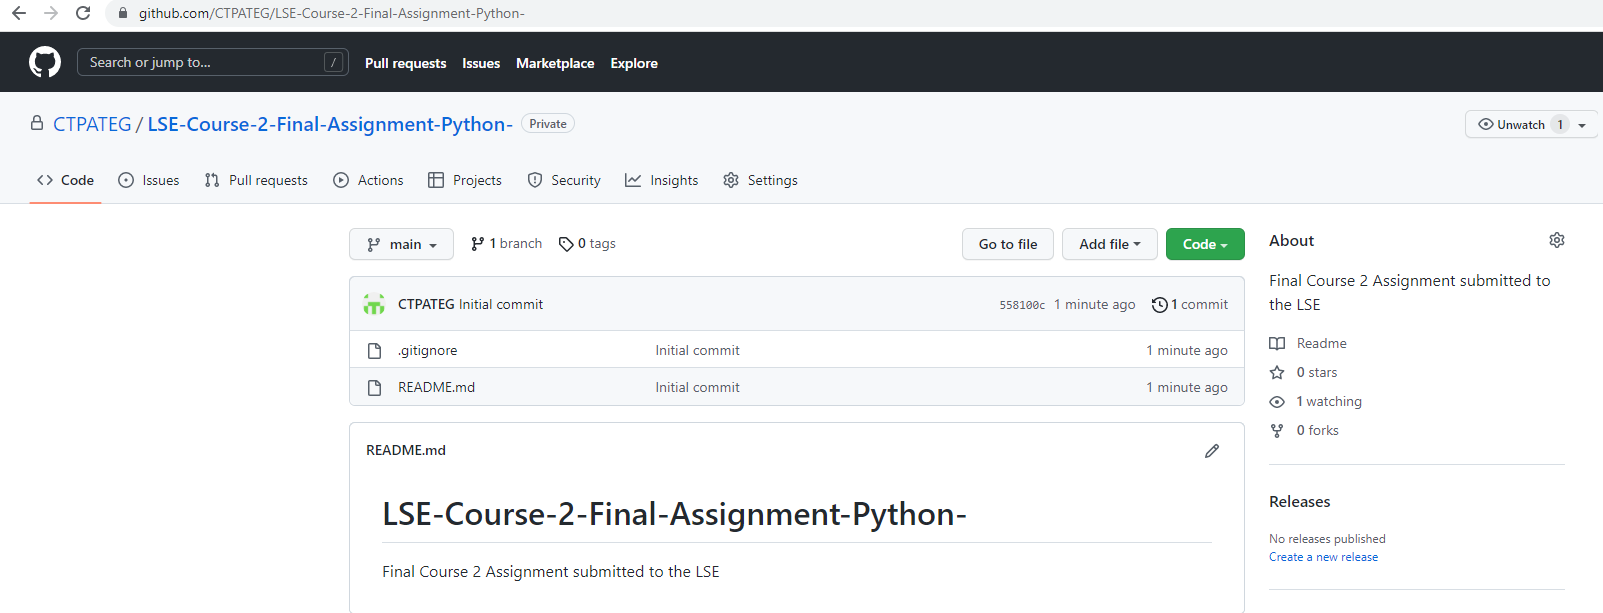

# Assignment activity 2 - Datasets Exploration

### 2.1 Prepare the workstation - Libraries

In [2]:
# Import all the potentially needed libraries for the assignment.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Ignore warnings.
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

### 2.2 Actual Duration dataset exploration

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [4]:
# Determine whether there are missing values.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [5]:
# Determine the metadata of the data set
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of the data set.
ad.describe()

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

Text(0.5, 1.0, 'Explore the overall spread of appointments data (Actual Duration)')

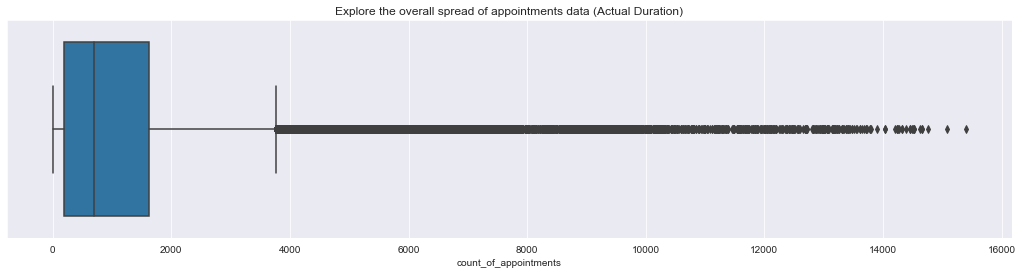

In [7]:
# Create a boxplot to investigate spread of appointments count at total dataset level (no specific variable).
# Set figure size.
fig_ad = plt.figure(figsize=(18, 4))

# Create a boxplot.
ad_box = sns.boxplot(x=ad['count_of_appointments'], whis=1.5)
ad_box.set_title(
    'Explore the overall spread of appointments data (Actual Duration)')

### 2.3 Appointments Regional dataset exploration

In [8]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [9]:
# Determine whether there are missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [10]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [11]:
# Determine the descriptive statistics of the data set.
ar.describe()

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

Text(0.5, 1.0, 'Explore the overall spread of appointments data (Appointments Regional)')

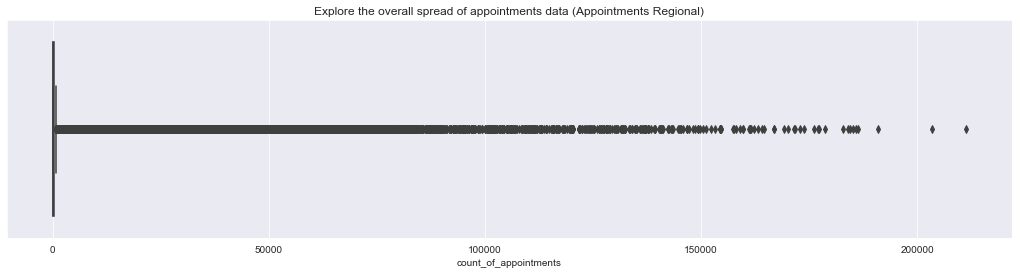

In [12]:
# Create a boxplot to investigate spread of appointments count at total dataset level (no specific variable).
# Set figure size.
fig_ar = plt.figure(figsize=(18, 4))

# Create a boxplot.
ar_box = sns.boxplot(x=ar['count_of_appointments'], whis=1.5)
ar_box.set_title(
    'Explore the overall spread of appointments data (Appointments Regional)')

### 2.4 National Categories dataset exploration

In [13]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [14]:
# Determine whether there are missing values.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [15]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [16]:
# Determine the descriptive statistics of the data set.
nc.describe()

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

Text(0.5, 1.0, 'Explore the overall spread of appointments data (National Categories)')

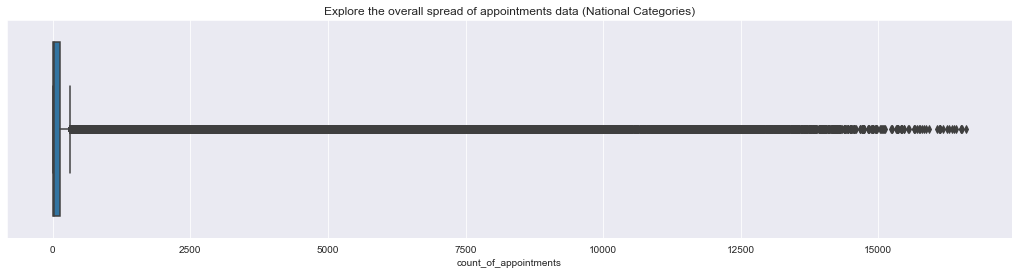

In [17]:
# Create a boxplot to investigate spread of appointments count at total dataset level (no specific variable).
# Set figure size.
fig_nc = plt.figure(figsize=(18, 4))

# Create a boxplot.
nc_box = sns.boxplot(x=nc['count_of_appointments'], whis=1.5)
nc_box.set_title(
    'Explore the overall spread of appointments data (National Categories)')

In [18]:
print(ad.columns)
print(ar.columns)
print(nc.columns)

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


### 2.5 Explore the data sets of interest

**Question 1:** How many locations are there in the data set?

In [19]:
# Determine the number of sub-locations.
print(
    f"Count of unique sub-locations: {nc['sub_icb_location_name'].nunique()}")

Count of unique sub-locations: 106


In [20]:
# Determine the number of locations.
print(f"Count of unique locations: {nc['icb_ons_code'].nunique()}")

Count of unique locations: 42


**Question 2:** What are the five locations with the highest number of records?



In [21]:
# Determine the top five sub-locations based on record count.
nc['sub_icb_location_name'].value_counts().head(5)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

### Please make sure to copy the icb_ons_name.csv from the submission zip folder
### into the Jupiter Notebook location when running the below code

In [22]:
# Import the supporting reference file created with the ons_code = ons name for the 42 locations.
# The ons codes does not add much value when talking with the client.
ons = pd.read_csv('icb_ons_name.csv')

# View the DataFrame.
ons.head()

icb_ons_code                      icb_location_name
0    E54000050  NHS North East and North Cumbria ICB 
1    E54000048  NHS Lancashire and South Cumbria ICB 
2    E54000057            NHS Greater Manchester ICB 
3    E54000008       NHS Cheshire and Merseyside ICB 
4    E54000061               NHS South Yorkshire ICB

In [23]:
# Run the inner join function to add the icb location name to the nc dataset
nc_ons = pd.merge(nc, ons, how='inner', on='icb_ons_code')

# View the DataFrame.
nc_ons.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month                      icb_location_name  
0           2021-08  NHS North East and North Cumbria ICB   
1           2021-08  NHS North East and North Cumbria ICB   
2           2021-08  NHS North East and North Cumbria ICB   
3           2021-08  NHS North East and North Cumbria ICB   
4           2021-08  NHS North East and North Cumbria ICB

In [24]:
# Determine the top five locations based on record count.
nc_ons['icb_location_name'].value_counts().head(20)

NHS Greater Manchester ICB                                 59180
NHS Cheshire and Merseyside ICB                            53744
NHS North East and North Cumbria ICB                       53707
NHS Lancashire and South Cumbria ICB                       43381
NHS West Yorkshire ICB                                     42888
NHS Humber and North Yorkshire ICB                         41402
NHS Staffordshire and Stoke                                34808
NHS Mid and South Essex ICB                                33309
NHS South Yorkshire ICB                                    27812
NHS Buckinghamshire Oxfordshire and Berkshire West ICB     27539
NHS Leicester Leicestershire and Rutland ICB               27409
NHS Sussex ICB                                             25835
NHS Hertfordshire and West Essex ICB                       25242
NHS Suffolk and North East Essex ICB                       20632
NHS Hampshire and Isle Of Wight ICB                        17419
NHS Nottingham and Nottin

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [25]:
# Determine the number of service settings.
print(f"The number of service settings: {nc['service_setting'].nunique()}")
nc['service_setting'].value_counts()

The number of service settings: 5


General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

In [26]:
# Determine the number of context types.
print(f"The number of context types: {nc['context_type'].nunique()}")
nc['context_type'].value_counts()

The number of context types: 3


Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

In [27]:
# Determine the number of national categories.
print(
    f"The number of national categories: {nc['national_category'].nunique()}")
nc['national_category'].value_counts()

The number of national categories: 18


Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

In [28]:
# Determine the number of appointment status.
print(
    f"The number of appointment statusses: {ar['appointment_status'].nunique()}")
ar['appointment_status'].value_counts()

The number of appointment statusses: 3


Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

# 

# Assignment activity 3 - Further Data Wrangling

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

In [29]:
# Import all the potentially needed libraries for the assignment.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ignore warnings.
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

### 3.1 Checking and validating the Dates on the datasets

**Question 1:** Between what dates were appointments scheduled? 

In [30]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [31]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [32]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [33]:
# Change the date format of ar['appointment_month'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DateFrame.
ar['appointment_month'].head

<bound method NDFrame.head of 0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
596816   2022-06-01
596817   2022-06-01
596818   2022-06-01
596819   2022-06-01
596820   2022-06-01
Name: appointment_month, Length: 596821, dtype: datetime64[ns]>

In [34]:
# Change the date format of nc['appointment_month'].
#nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# View the DateFrame (leave as string).
nc['appointment_month'].head

<bound method NDFrame.head of 0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_month, Length: 817394, dtype: object>

In [35]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(ad['appointment_date'].min())
print(ad['appointment_date'].max())
print(
    f"The earliest date in the actual_duration dataset is {ad['appointment_date'].min()}")
print(
    f"The latest date in the actual_duration dataset is {ad['appointment_date'].max()}")

2021-12-01 00:00:00
2022-06-30 00:00:00
The earliest date in the actual_duration dataset is 2021-12-01 00:00:00
The latest date in the actual_duration dataset is 2022-06-30 00:00:00


In [36]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(nc['appointment_date'].min())
print(nc['appointment_date'].max())
print(
    f"The earliest date in the national_categories dataset is {nc['appointment_date'].min()}")
print(
    f"The latest date in the national_categories dataset is {nc['appointment_date'].max()}")

2021-08-01 00:00:00
2022-06-30 00:00:00
The earliest date in the national_categories dataset is 2021-08-01 00:00:00
The latest date in the national_categories dataset is 2022-06-30 00:00:00


In [37]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())
print(
    f"The earliest month in the appointments_regional dataset is {ar['appointment_month'].min()}")
print(
    f"The latest month in the appointments_regional dataset is {ar['appointment_month'].max()}")

2020-01-01 00:00:00
2022-06-01 00:00:00
The earliest month in the appointments_regional dataset is 2020-01-01 00:00:00
The latest month in the appointments_regional dataset is 2022-06-01 00:00:00


### 3.2 Exploring the Service Settings

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [38]:
# For each of these service settings, determine the number of records available for the period and the location. 
# ['sub_icb_location_name' == 'NHS North West London ICB - W2U3Z']

# Create a DataFrame.
data = pd.DataFrame(nc)

# Change the date format.
data['appointment_date'] = pd.to_datetime(data['appointment_date'])

# Apply date filter between 01/01/2022 and 01/06/2022 (5 months) as stated on the assignment.
nc_date_filter = data[(data['appointment_date'] >= "2022-01-01")
                      & (data['appointment_date'] < "2022-06-01")]

# Use lambda function to filter out all the locations except NW London.
nc_nwl_lambda = nc_date_filter[nc_date_filter['sub_icb_location_name'].apply(lambda x:
                                                                             'NHS North West London ICB - W2U3Z' in x)]

# Group the result by service setting.
nc_subset = nc_nwl_lambda.groupby(['sub_icb_location_name', 'service_setting'])[['count_of_appointments']].sum() \
    .sort_values('count_of_appointments', ascending=False)
print(nc_subset)
print(nc_subset.sum())

                                                             count_of_appointments
sub_icb_location_name             service_setting                                 
NHS North West London ICB - W2U3Z General Practice                         4760966
                                  Unmapped                                  387939
                                  Other                                     151616
                                  Primary Care Network                      108901
                                  Extended Access Provision                  97409
count_of_appointments    5506831
dtype: int64


### 3.3 Exploring the monthly number of appointments and total records

**Question 3:** Which month had the highest number of appointments?

In [39]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
# Apply dictionary to map the month numbers to the month names.
# Sort by the highest number of appointments.
nc_group = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month.map
                       ({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                         5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
                         10: 'October', 11: 'November', 12: 'December'})
                       ])[['count_of_appointments']].sum()\
    .sort_values('count_of_appointments', ascending=False)

print(nc_group)
print(nc_group.sum())

                                   count_of_appointments
appointment_date appointment_date                       
2021             November                       30405070
                 October                        30303834
2022             March                          29595038
2021             September                      28522501
2022             May                            27495508
                 June                           25828078
                 January                        25635474
                 February                       25355260
2021             December                       25140776
2022             April                          23913060
2021             August                         23852171
count_of_appointments    296046770
dtype: int64


**Question 4:** What was the total number of records per month?

In [40]:
# Total number of records per month.
# Apply dictionary to map the month numbers to the month names.
# Sort by the highest number of records.
nc_count = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month.map
                       ({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                         5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
                         10: 'October', 11: 'November', 12: 'December'})
                       ])[['count_of_appointments']].count()\
    .sort_values('count_of_appointments', ascending=False)

print(nc_count)
print(nc_count.sum())

                                   count_of_appointments
appointment_date appointment_date                       
2022             March                             82822
2021             November                          77652
2022             May                               77425
2021             September                         74922
2022             June                              74168
2021             October                           74078
                 December                          72651
2022             January                           71896
                 February                          71769
                 April                             70012
2021             August                            69999
count_of_appointments    817394
dtype: int64


In [41]:
# Isolate the monthly records.
nc_count = nc['appointment_date'].dt.month.map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                                5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
                                                10: 'October', 11: 'November', 12: 'December'})
nc_count.value_counts()

March        82822
November     77652
May          77425
September    74922
June         74168
October      74078
December     72651
January      71896
February     71769
April        70012
August       69999
Name: appointment_date, dtype: int64

# 

# Assignment activity 4 - Data Exploration via Visualisations

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [42]:
# Import the necessary libraries.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Ignore warnings.
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

### 4.1 Visualisations to generate monthly numbers

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [43]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc['appointment_month'].head()

0    2021-08
1    2021-08
2    2021-08
3    2021-08
4    2021-08
Name: appointment_month, dtype: object

In [44]:
# Aggregate on monthly level and determine the sum of records per month.
nc_count_month = nc.groupby(['appointment_month'])[
    ['count_of_appointments']].count().reset_index()

# View output.
nc_count_month

appointment_month  count_of_appointments
0            2021-08                  69999
1            2021-09                  74922
2            2021-10                  74078
3            2021-11                  77652
4            2021-12                  72651
5            2022-01                  71896
6            2022-02                  71769
7            2022-03                  82822
8            2022-04                  70012
9            2022-05                  77425
10           2022-06                  74168

In [45]:
# Aggregate on monthly level and determine the sum of records per month.
nc_sum_month = nc.groupby(['appointment_month']).sum().reset_index()

# View output.
nc_sum_month

appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

Text(0.5, 0, 'Months')

Text(0, 0.5, 'No of Records')

Text(0.5, 1.0, 'Number of Records by Month')

[Text(0, 0, '69999'),
 Text(0, 0, '74922'),
 Text(0, 0, '74078'),
 Text(0, 0, '77652'),
 Text(0, 0, '72651'),
 Text(0, 0, '71896'),
 Text(0, 0, '71769'),
 Text(0, 0, '82822'),
 Text(0, 0, '70012'),
 Text(0, 0, '77425'),
 Text(0, 0, '74168')]

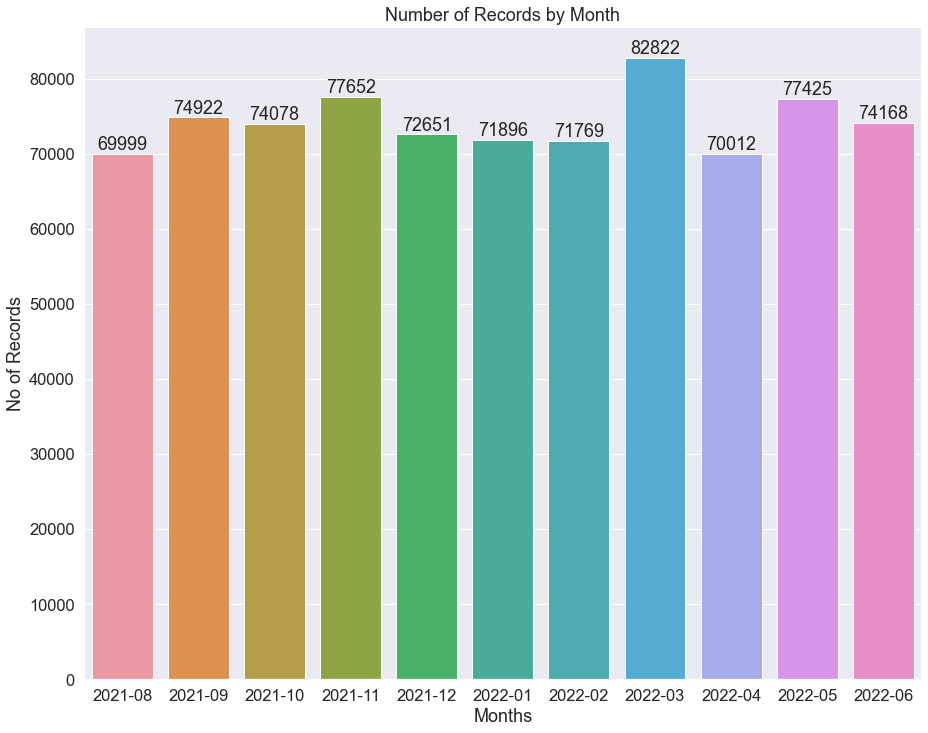

In [46]:
# View monthly number of records.
sns.set(font_scale=1.5)
monthly_bar = plt.figure(figsize=(15, 12))
monthly_bar = sns.countplot(x='appointment_month', data=nc)

# Set legend and title.
monthly_bar.set_xlabel('Months')
monthly_bar.set_ylabel('No of Records')
monthly_bar.set_title('Number of Records by Month')
monthly_bar.bar_label(monthly_bar.containers[0])

# View output.
plt.show()

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Sum of Appointments by Month')

[Text(0, 0, '2.38522e+07'),
 Text(0, 0, '2.85225e+07'),
 Text(0, 0, '3.03038e+07'),
 Text(0, 0, '3.04051e+07'),
 Text(0, 0, '2.51408e+07'),
 Text(0, 0, '2.56355e+07'),
 Text(0, 0, '2.53553e+07'),
 Text(0, 0, '2.9595e+07'),
 Text(0, 0, '2.39131e+07'),
 Text(0, 0, '2.74955e+07'),
 Text(0, 0, '2.58281e+07')]

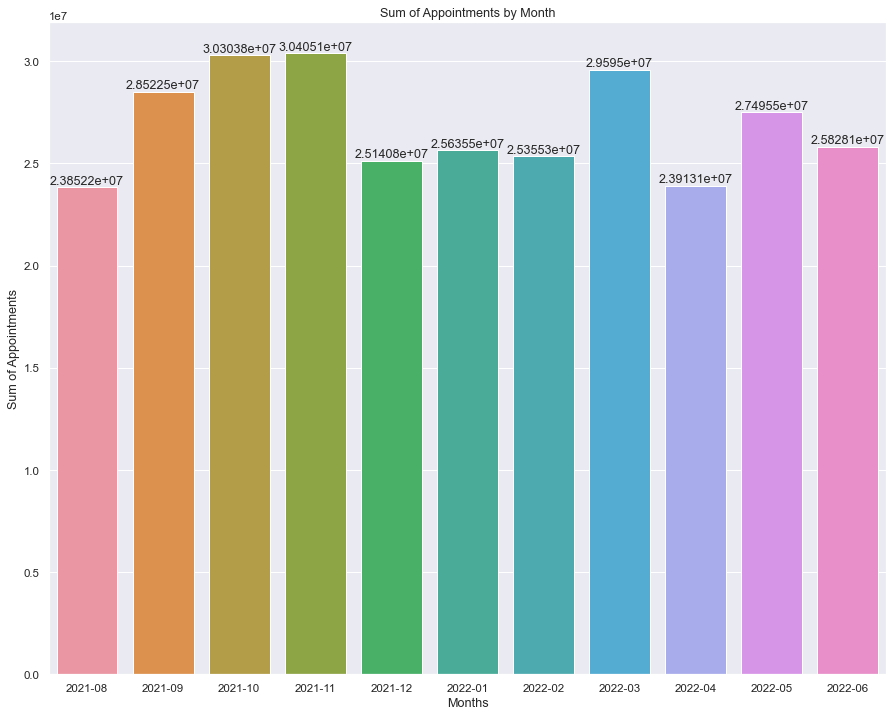

In [47]:
# View monthly sum of appointments.
sns.set(font_scale=1.05)
monthly_bar = plt.figure(figsize=(15, 12))
monthly_bar = sns.barplot(x='appointment_month',
                          y='count_of_appointments', data=nc_sum_month)

# Set legend and title.
monthly_bar.set_xlabel('Months')
monthly_bar.set_ylabel('Sum of Appointments')
monthly_bar.set_title('Sum of Appointments by Month')
monthly_bar.bar_label(monthly_bar.containers[0])

# View output.
plt.show()

### 4.2 Deep Dive into the Appointments by Service Settings, Context Types, National Categories

**Service settings:**

In [48]:
# Plot the appointments over the available date range, and review the service settings for months.
data = pd.DataFrame(nc)

nc_ss = data.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum().reset_index()

# View output
print(nc_ss['service_setting'].nunique())
nc_ss.head()

5


appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Service Settings')

Text(0.5, 1.0, 'Service Settings by Month')

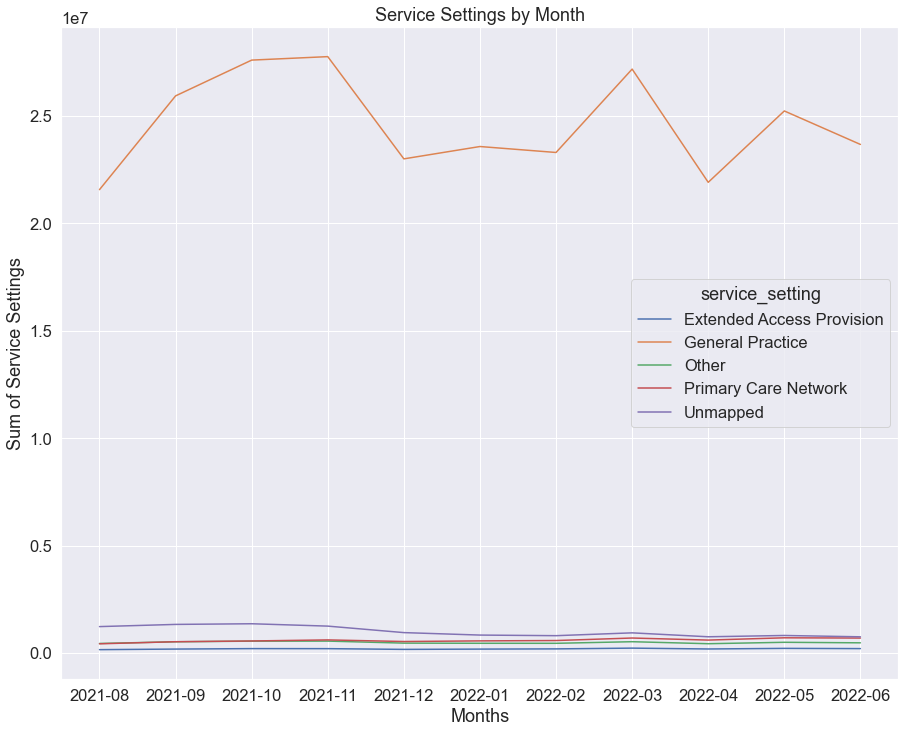

In [49]:
# Create a lineplot.
sns.set(font_scale=1.5)
nc_ss_line = plt.figure(figsize=(15, 12))
nc_ss_line = sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss,
                          hue='service_setting', markers=True, ci=None)

# Set legend and title.
nc_ss_line.set_xlabel('Months')
nc_ss_line.set_ylabel('Sum of Service Settings')
nc_ss_line.set_title('Service Settings by Month')

In [50]:
# Create a csv file to save the dataset for the future use if required.
nc_ss.to_csv('nc_ss.csv', index=False)

**Context types:**

In [51]:
# Create a separate data set that can be used in future weeks.
# Plot the appointments over the available date range, and review the context types for months.
data = pd.DataFrame(nc)
nc_ct = data.groupby(['appointment_month', 'context_type'])[
    ['count_of_appointments']].sum().reset_index()

# View output.
print(nc_ct['context_type'].nunique())
nc_ct.head()

3


appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Context Types')

Text(0.5, 1.0, 'Context Types by Month')

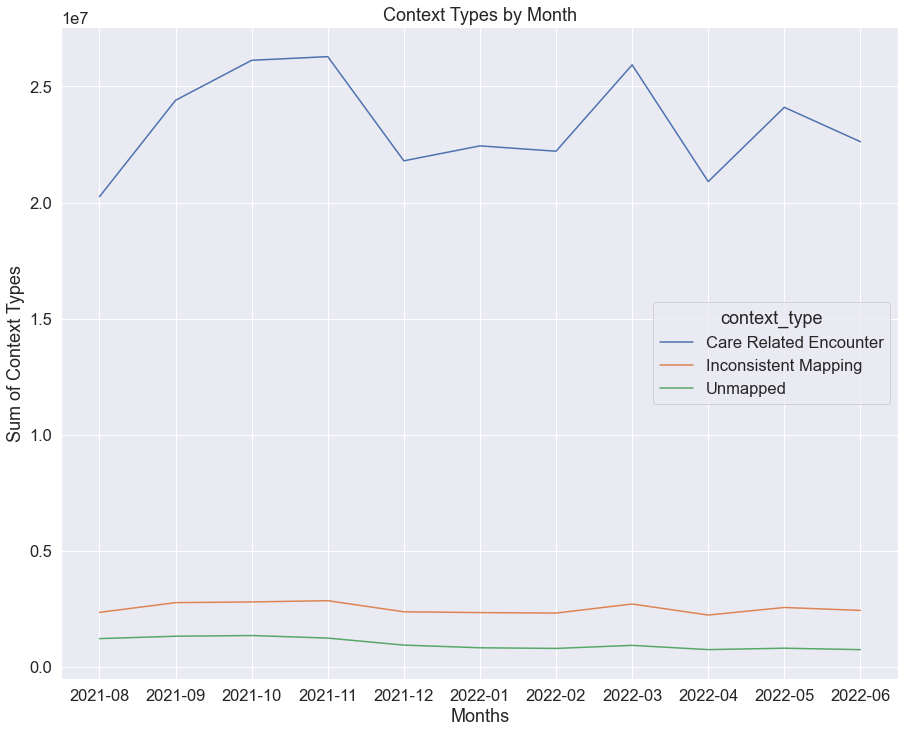

In [52]:
# Create a lineplot.
sns.set(font_scale=1.5)
nc_ct_line = plt.figure(figsize=(15, 12))
nc_ct_line = sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ct,
                          hue='context_type', markers=True, ci=None)

# Set legend and title.
nc_ct_line.set_xlabel('Months')
nc_ct_line.set_ylabel('Sum of Context Types')
nc_ct_line.set_title('Context Types by Month')

In [53]:
# Create a csv file to save the dataset for the future use if required.
nc_ct.to_csv('nc_ct.csv', index=False)

**National categories:**

In [54]:
# Create a separate data set that can be used in future weeks.
# Plot the appointments over the available date range, and review the national categories for months.
data = pd.DataFrame(nc)
nc_nc = data.groupby(['appointment_month', 'national_category'])[
    ['count_of_appointments']].sum().reset_index()

# View output.
print(nc_nc['national_category'].nunique())
nc_nc.head()

18


appointment_month                                  national_category  \
0           2021-08  Care Home Needs Assessment & Personalised Care...   
1           2021-08                                    Care Home Visit   
2           2021-08                                    Clinical Triage   
3           2021-08                         General Consultation Acute   
4           2021-08                       General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of National Categories')

Text(0.5, 1.0, 'National Categories by Month')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

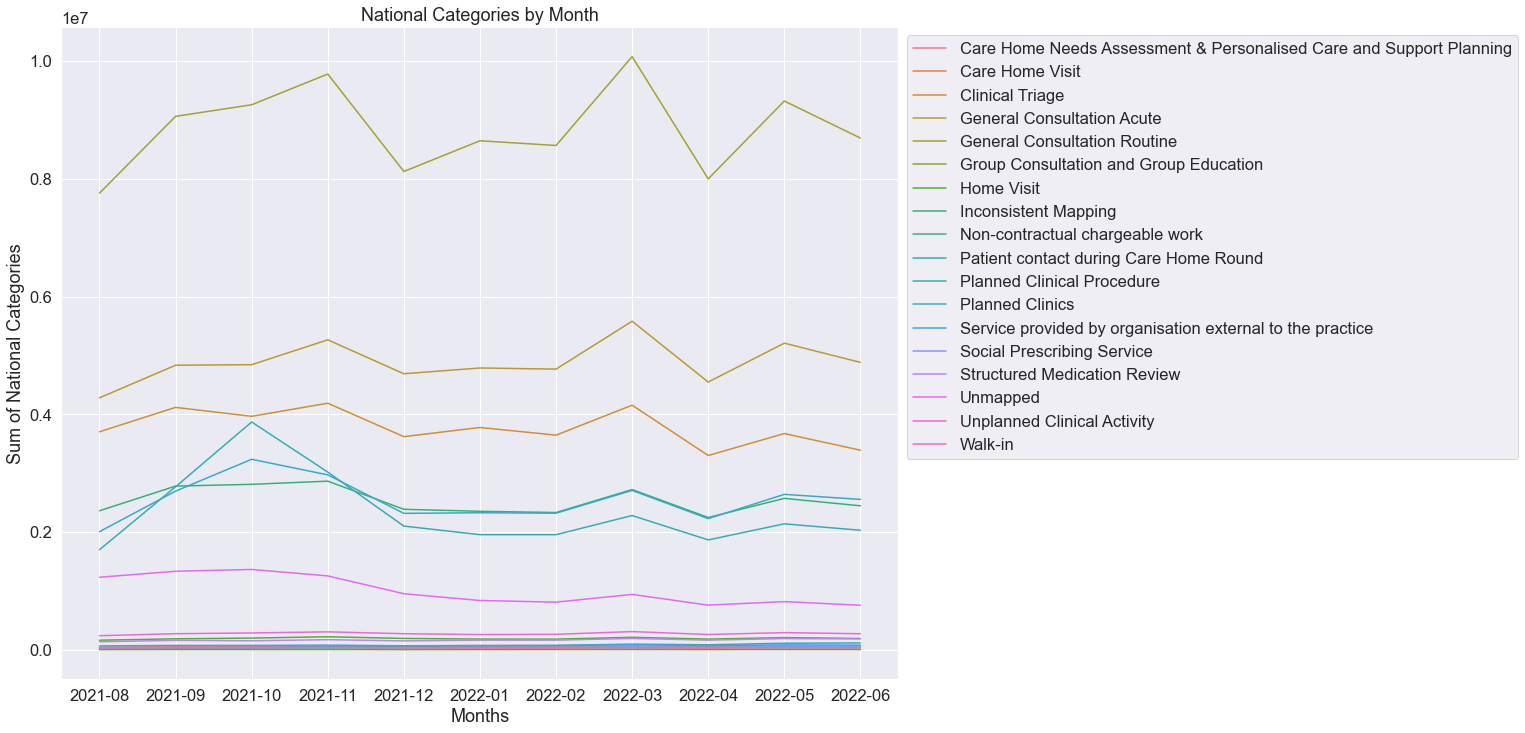

In [55]:
# Create a lineplot.
sns.set(font_scale=1.5)

nc_nc_line = plt.figure(figsize=(15, 12))
nc_nc_line = sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_nc,
                          hue='national_category', markers=True, ci=None)

# Set legend and title.
nc_nc_line.set_xlabel('Months')
nc_nc_line.set_ylabel('Sum of National Categories')
nc_nc_line.set_title('National Categories by Month')
plt.setp(nc_nc_line.get_legend().get_texts(), fontsize='10')
nc_nc_line.legend(bbox_to_anchor=(1, 1))

In [56]:
# Create a csv file to save the dataset for the future use if required.
nc_nc.to_csv('nc_nc.csv', index=False)

### 4.3 Check the seasonality for the Service Settings

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [57]:
# Create a separate data set that can be used in future weeks.
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum().reset_index()
# View output.
nc_ss_day.head()

appointment_date appointment_month            service_setting  \
0       2021-08-01           2021-08  Extended Access Provision   
1       2021-08-01           2021-08           General Practice   
2       2021-08-01           2021-08                      Other   
3       2021-08-01           2021-08       Primary Care Network   
4       2021-08-01           2021-08                   Unmapped   

   count_of_appointments  
0                    438  
1                   3411  
2                    401  
3                    323  
4                   1054

In [58]:
# Create a csv file to save the dataset for the future use if required.
nc_ss_day.to_csv('nc_ss_day.csv', index=False)

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Service Settings')

Text(0.5, 1.0, 'Appointments by Service Setting in August 2021')

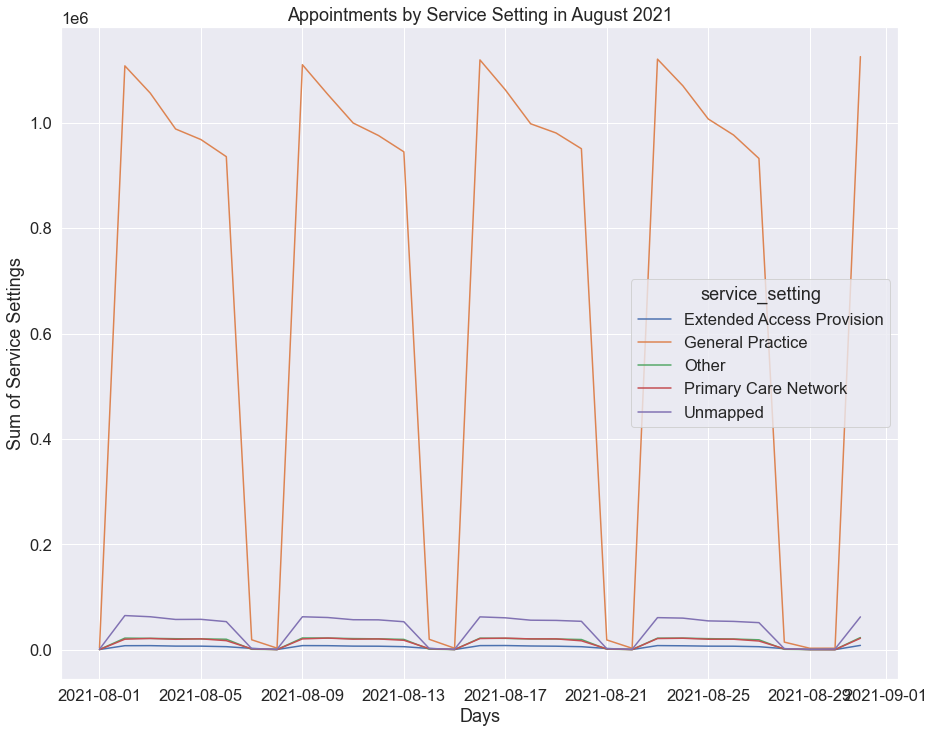

In [59]:
# Look at August 2021 in more detail to allow a closer look.
# nc_aug21 = nc_ss_day[(nc_ss_day['appointment_date'] >='2021-08-01') & (nc_ss_day['appointment_date'] <= '2021-08-31')]
nc_aug21 = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_aug21_line = plt.figure(figsize=(15, 12))
nc_aug21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_aug21,
                             hue='service_setting', markers=True, ci=None)

# Set legend and title.
nc_aug21_line.set_xlabel('Days')
nc_aug21_line.set_ylabel('Sum of Service Settings')
nc_aug21_line.set_title('Appointments by Service Setting in August 2021')

**Autumn (October 2021):**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Service Settings')

Text(0.5, 1.0, 'Appointments by Service Setting in October 2021')

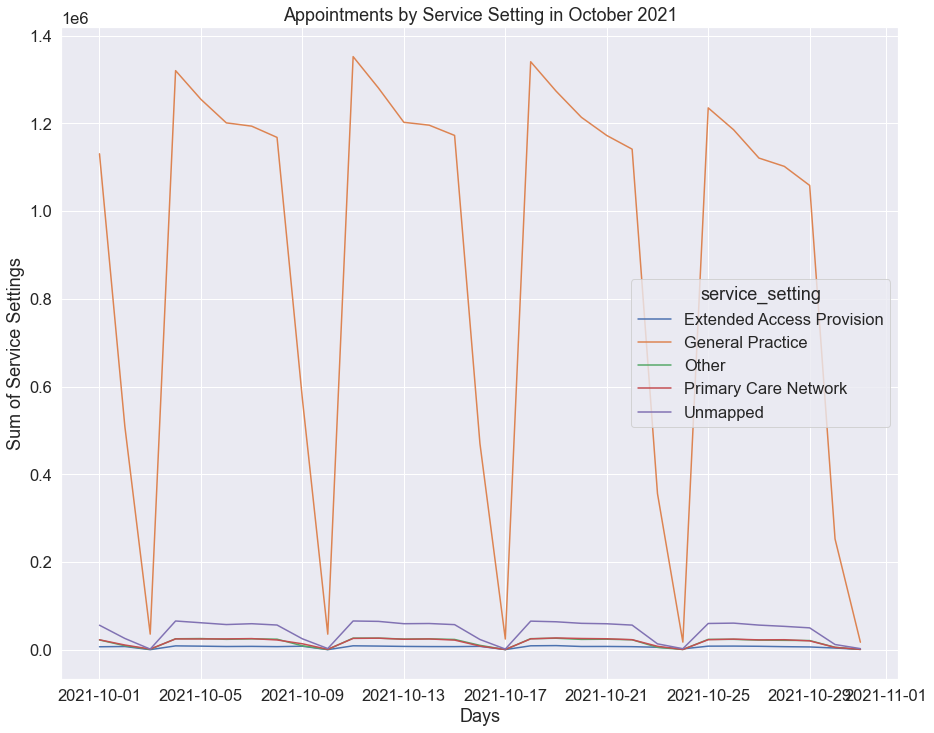

In [60]:
# Look at October 2021 in more detail to allow a closer look.
nc_oct21 = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_oct21_line = plt.figure(figsize=(15, 12))
nc_oct21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_oct21,
                             hue='service_setting', markers=True, ci=None)

# Set legend and title.
nc_oct21_line.set_xlabel('Days')
nc_oct21_line.set_ylabel('Sum of Service Settings')
nc_oct21_line.set_title('Appointments by Service Setting in October 2021')

**Winter (January 2022):**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Service Settings')

Text(0.5, 1.0, 'Appointments by Service Setting in January 2022')

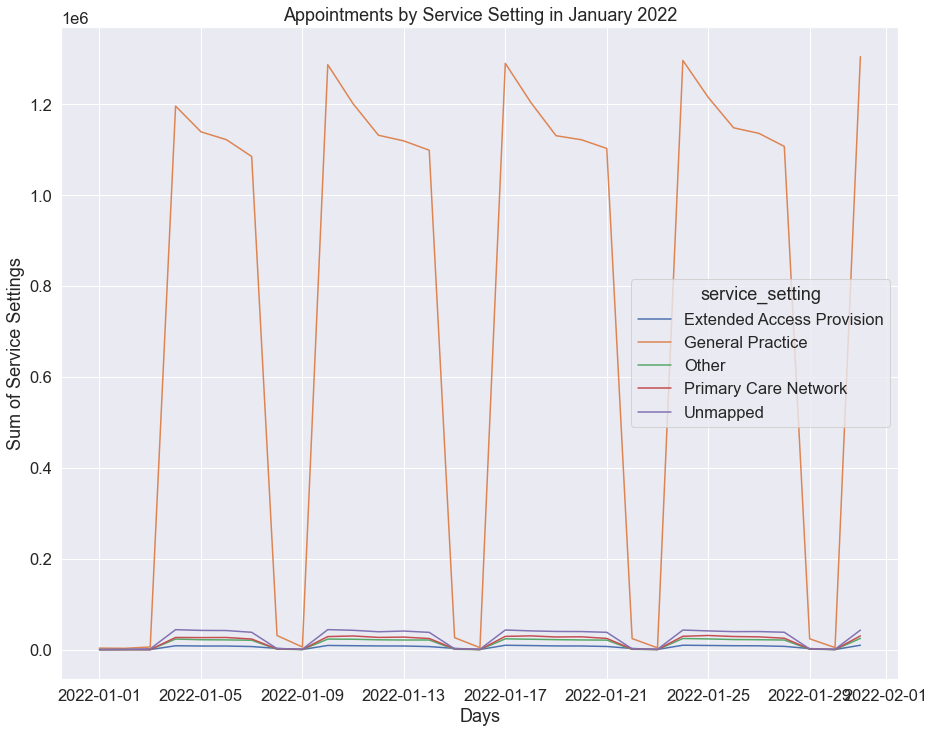

In [61]:
# Look at January 2022 in more detail to allow a closer look.
nc_jan22 = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_jan22_line = plt.figure(figsize=(15, 12))
nc_jan22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_jan22,
                             hue='service_setting', markers=True, ci=None)

# Set legend and title.
nc_jan22_line.set_xlabel('Days')
nc_jan22_line.set_ylabel('Sum of Service Settings')
nc_jan22_line.set_title('Appointments by Service Setting in January 2022')

**Spring (April 2022):**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Service Settings')

Text(0.5, 1.0, 'Appointments by Service Setting in April 2022')

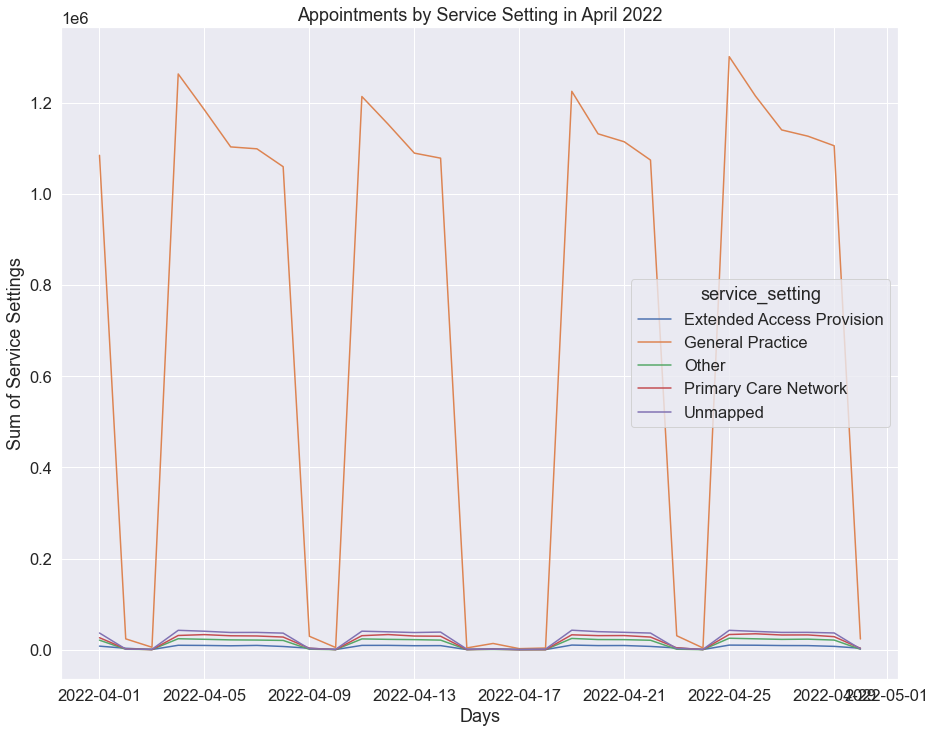

In [62]:
# Look at April 2022 in more detail to allow a closer look.
nc_apr22 = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_apr22_line = plt.figure(figsize=(15, 12))
nc_apr22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_apr22,
                             hue='service_setting', markers=True, ci=None)

# Set legend and title.
nc_apr22_line.set_xlabel('Days')
nc_apr22_line.set_ylabel('Sum of Service Settings')
nc_apr22_line.set_title('Appointments by Service Setting in April 2022')

### Expand Seasonal Analysis into Context Types and National Categories

In [63]:
# Create a separate data set for Context Types that can be used in future weeks.
nc_ct_day = nc.groupby(['appointment_date', 'appointment_month', 'context_type'])[
    ['count_of_appointments']].sum().reset_index()
# View output.
nc_ct_day.head()

appointment_date appointment_month            context_type  \
0       2021-08-01           2021-08  Care Related Encounter   
1       2021-08-01           2021-08    Inconsistent Mapping   
2       2021-08-01           2021-08                Unmapped   
3       2021-08-02           2021-08  Care Related Encounter   
4       2021-08-02           2021-08    Inconsistent Mapping   

   count_of_appointments  
0                   4033  
1                    540  
2                   1054  
3                1036496  
4                 121396

In [64]:
# Create a csv file to save the dataset for the future use if required.
nc_ct_day.to_csv('nc_ct_day.csv', index=False)

In [65]:
# Create a separate data set for National Categories that can be used in future weeks.
nc_nc_day = nc.groupby(['appointment_date', 'appointment_month', 'national_category'])[
    ['count_of_appointments']].sum().reset_index()
# View output.
nc_nc_day.head()

appointment_date appointment_month  \
0       2021-08-01           2021-08   
1       2021-08-01           2021-08   
2       2021-08-01           2021-08   
3       2021-08-01           2021-08   
4       2021-08-01           2021-08   

                                   national_category  count_of_appointments  
0  Care Home Needs Assessment & Personalised Care...                      2  
1                                    Care Home Visit                      5  
2                                    Clinical Triage                    857  
3                         General Consultation Acute                    662  
4                       General Consultation Routine                   1279

In [66]:
# Create a csv file to save the dataset for the future use if required.
nc_nc_day.to_csv('nc_nc_day.csv', index=False)

**Summer (August 2021): Context Types and National Categories**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Context Types')

Text(0.5, 1.0, 'Appointments by Context Types in August 2021')

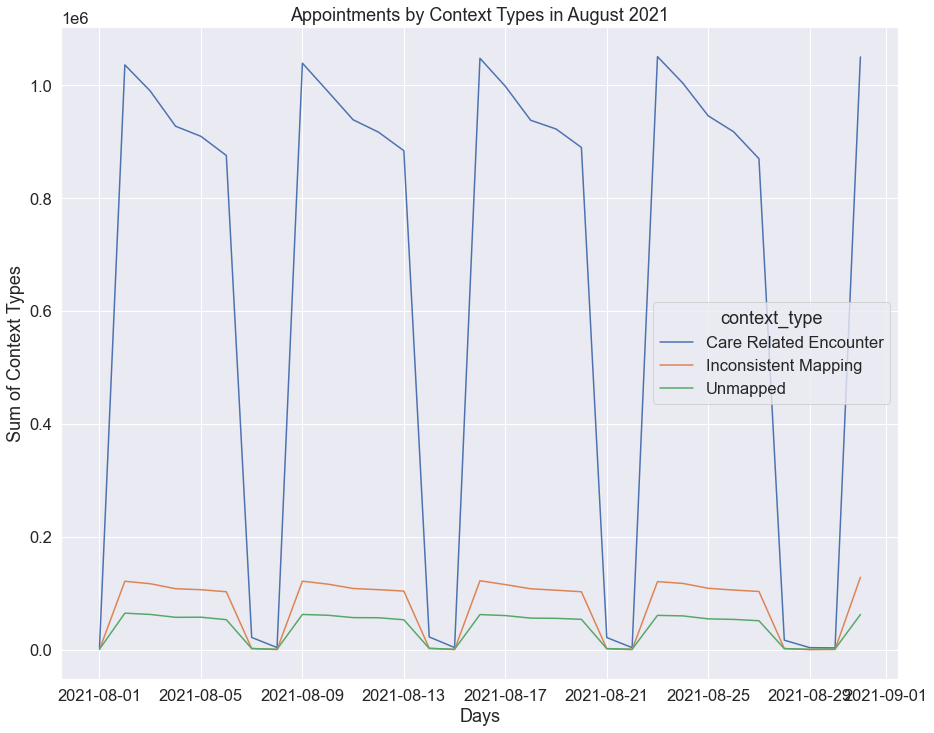

In [67]:
# Look at August 2021 Context Types in more detail to allow a closer look.
nc_aug21 = nc_ct_day[nc_ct_day['appointment_month'] == '2021-08']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_aug21_line = plt.figure(figsize=(15, 12))
nc_aug21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_aug21,
                             hue='context_type', markers=True, ci=None)

# Set legend and title.
nc_aug21_line.set_xlabel('Days')
nc_aug21_line.set_ylabel('Sum of Context Types')
nc_aug21_line.set_title('Appointments by Context Types in August 2021')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of National Categories')

Text(0.5, 1.0, 'Appointments by National Categories in August 2021')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

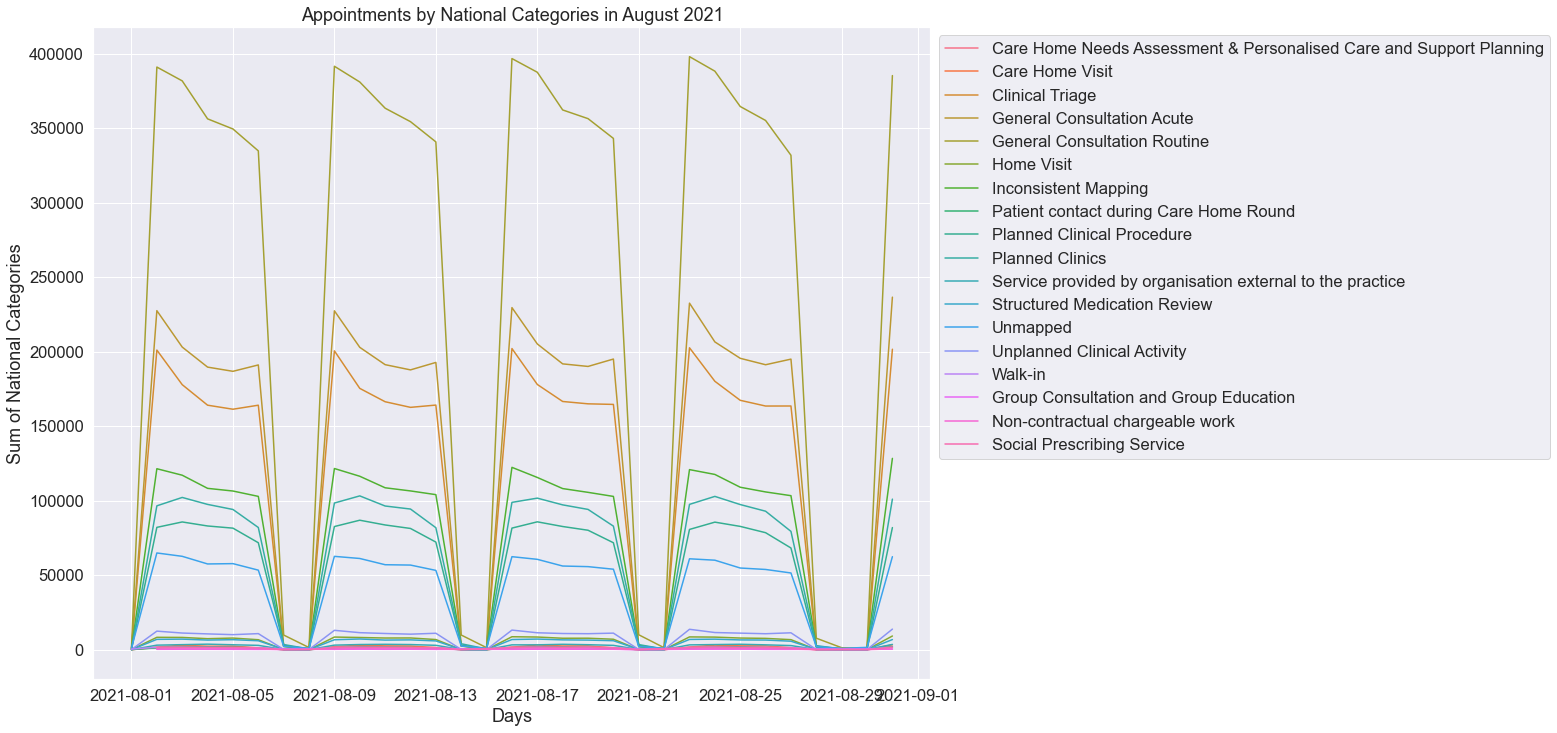

In [68]:
# Look at August 2021 National Categories in more detail to allow a closer look.
# nc_aug21 = nc_ss_day[(nc_ss_day['appointment_date'] >='2021-08-01') & (nc_ss_day['appointment_date'] <= '2021-08-31')]
nc_aug21 = nc_nc_day[nc_nc_day['appointment_month'] == '2021-08']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_aug21_line = plt.figure(figsize=(15, 12))
nc_aug21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_aug21,
                             hue='national_category', markers=True, ci=None)

# Set legend and title.
nc_aug21_line.set_xlabel('Days')
nc_aug21_line.set_ylabel('Sum of National Categories')
nc_aug21_line.set_title('Appointments by National Categories in August 2021')
plt.setp(nc_aug21_line.get_legend().get_texts(), fontsize='10')
nc_aug21_line.legend(bbox_to_anchor=(1, 1))

**Autumn (October 2021): Context Types and National Categories**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Context Types')

Text(0.5, 1.0, 'Appointments by Context Types in October 2021')

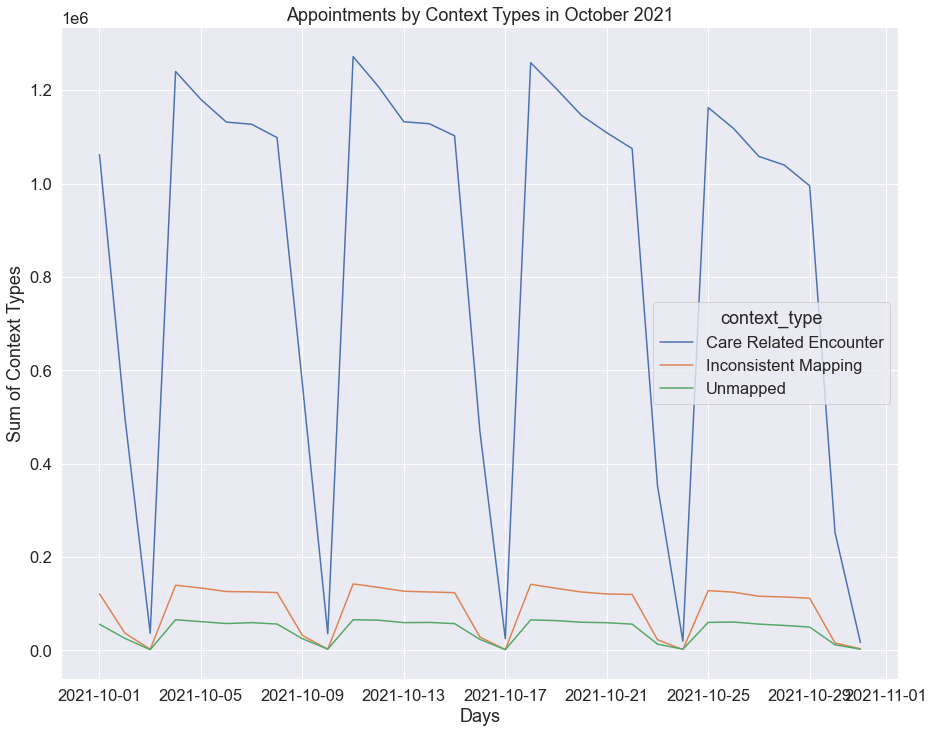

In [69]:
# Look at October 2021 Context Types in more detail to allow a closer look.
nc_oct21 = nc_ct_day[nc_ct_day['appointment_month'] == '2021-10']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_oct21_line = plt.figure(figsize=(15, 12))
nc_oct21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_oct21,
                             hue='context_type', markers=True, ci=None)

# Set legend and title.
nc_oct21_line.set_xlabel('Days')
nc_oct21_line.set_ylabel('Sum of Context Types')
nc_oct21_line.set_title('Appointments by Context Types in October 2021')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of National Categories')

Text(0.5, 1.0, 'Appointments by National Categories in October 2021')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

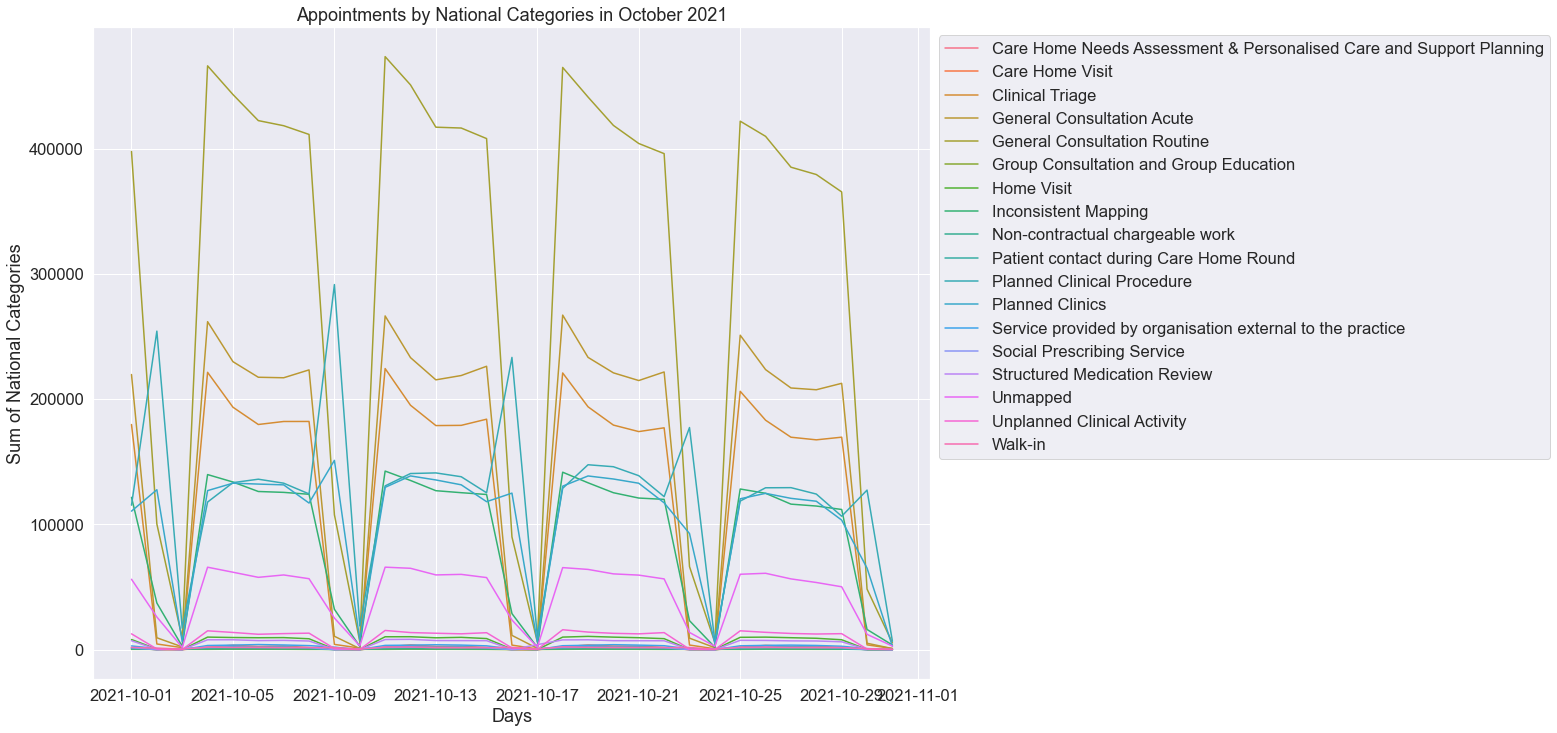

In [70]:
# Look at October 2021 National Categories in more detail to allow a closer look.
nc_oct21 = nc_nc_day[nc_nc_day['appointment_month'] == '2021-10']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_oct21_line = plt.figure(figsize=(15, 12))
nc_oct21_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_oct21,
                             hue='national_category', markers=True, ci=None)

# Set legend and title.
nc_oct21_line.set_xlabel('Days')
nc_oct21_line.set_ylabel('Sum of National Categories')
nc_oct21_line.set_title('Appointments by National Categories in October 2021')
plt.setp(nc_oct21_line.get_legend().get_texts(), fontsize='10')
nc_oct21_line.legend(bbox_to_anchor=(1, 1))

**Winter (January 2022): Context Types and National Categories**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Context Types')

Text(0.5, 1.0, 'Appointments by Context Types in January 2022')

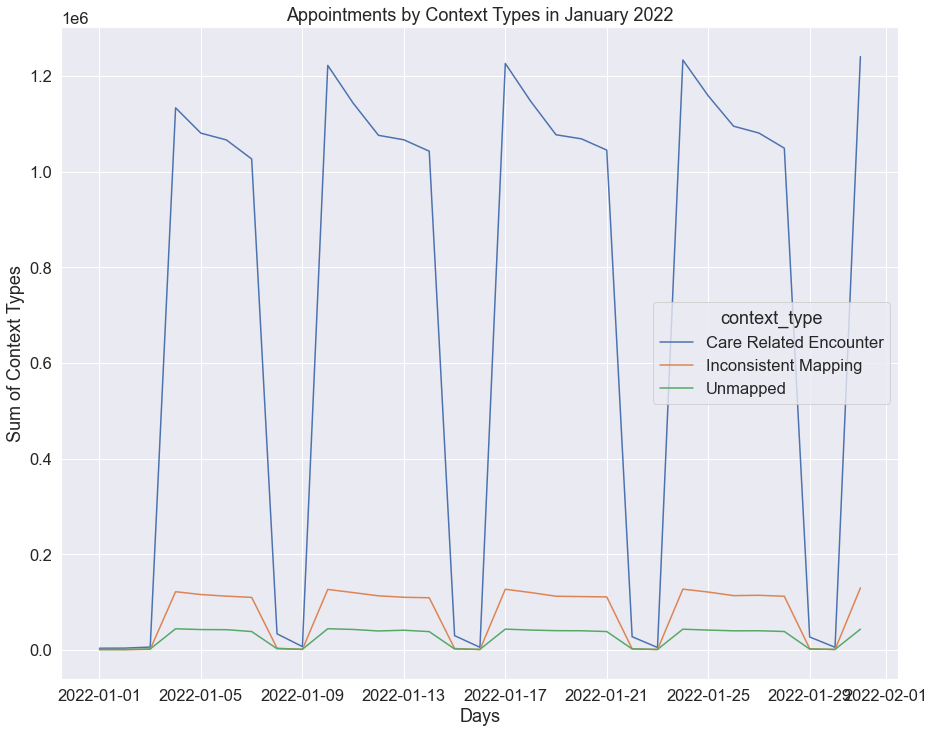

In [71]:
# Look at January 2022 Context Types in more detail to allow a closer look.
nc_jan22 = nc_ct_day[nc_ct_day['appointment_month'] == '2022-01']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_jan22_line = plt.figure(figsize=(15, 12))
nc_jan22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_jan22,
                             hue='context_type', markers=True, ci=None)

# Set legend and title.
nc_jan22_line.set_xlabel('Days')
nc_jan22_line.set_ylabel('Sum of Context Types')
nc_jan22_line.set_title('Appointments by Context Types in January 2022')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of National Categories')

Text(0.5, 1.0, 'Appointments by National Categories in January 2022')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

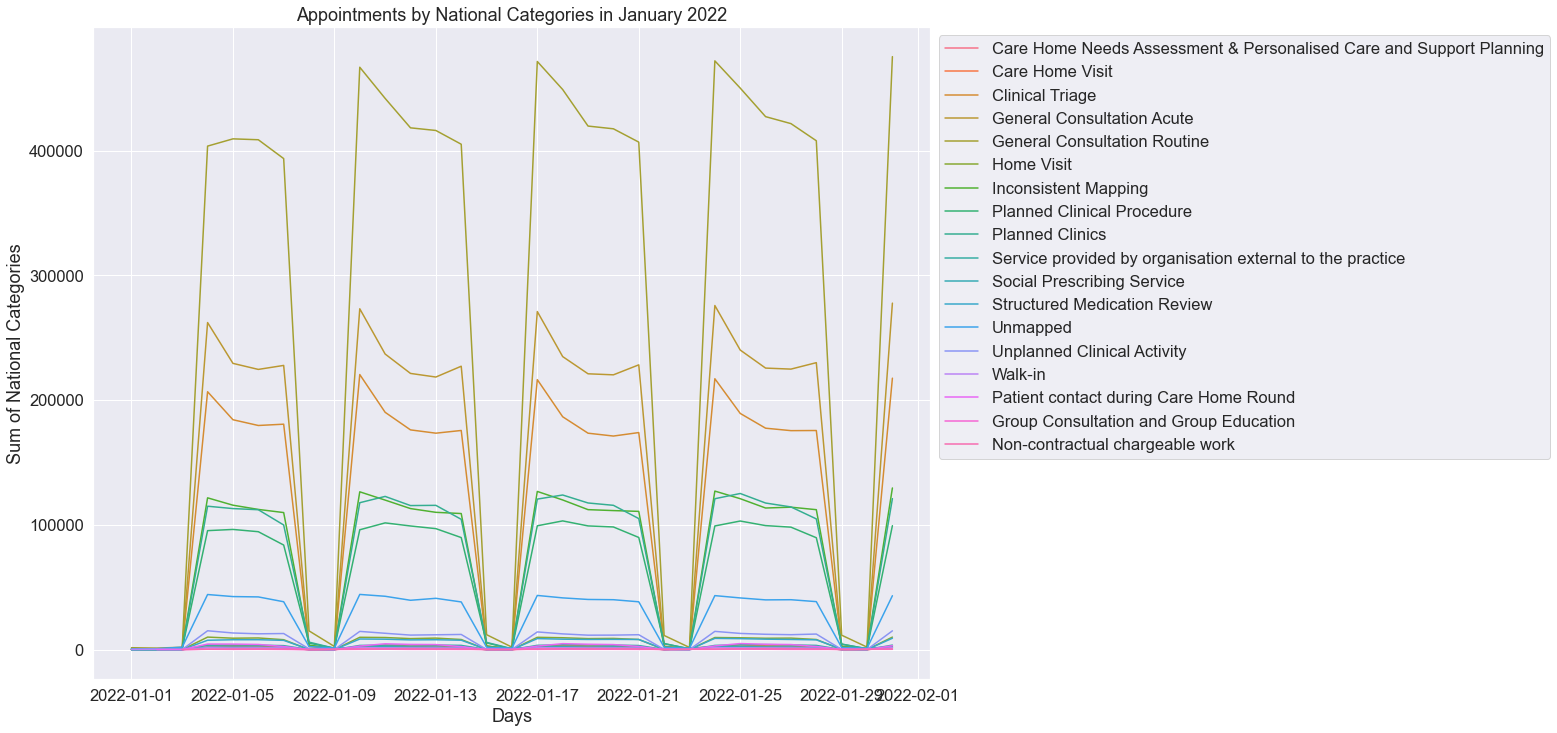

In [72]:
# Look at January 2022 National Categories in more detail to allow a closer look.
nc_jan22 = nc_nc_day[nc_nc_day['appointment_month'] == '2022-01']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_jan22_line = plt.figure(figsize=(15, 12))
nc_jan22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_jan22,
                             hue='national_category', markers=True, ci=None)

# Set legend and title.
nc_jan22_line.set_xlabel('Days')
nc_jan22_line.set_ylabel('Sum of National Categories')
nc_jan22_line.set_title('Appointments by National Categories in January 2022')
plt.setp(nc_jan22_line.get_legend().get_texts(), fontsize='10')
nc_jan22_line.legend(bbox_to_anchor=(1, 1))

**Spring (April 2022): Context Types and National Categories**

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of Context Types')

Text(0.5, 1.0, 'Appointments by Context Types in April 2022')

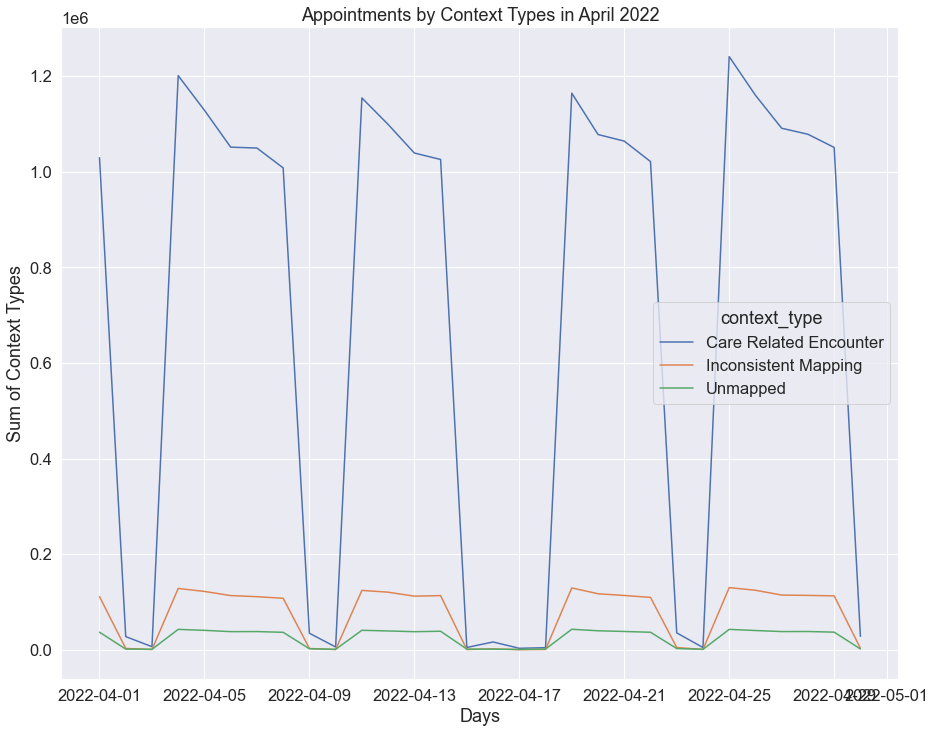

In [73]:
# Look at April 2022 Context Types in more detail to allow a closer look.
nc_apr22 = nc_ct_day[nc_ct_day['appointment_month'] == '2022-04']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_apr22_line = plt.figure(figsize=(15, 12))
nc_apr22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_apr22,
                             hue='context_type', markers=True, ci=None)

# Set legend and title.
nc_apr22_line.set_xlabel('Days')
nc_apr22_line.set_ylabel('Sum of Context Types')
nc_apr22_line.set_title('Appointments by Context Types in April 2022')

Text(0.5, 0, 'Days')

Text(0, 0.5, 'Sum of National Categories')

Text(0.5, 1.0, 'Appointments by National Categories in April 2022')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

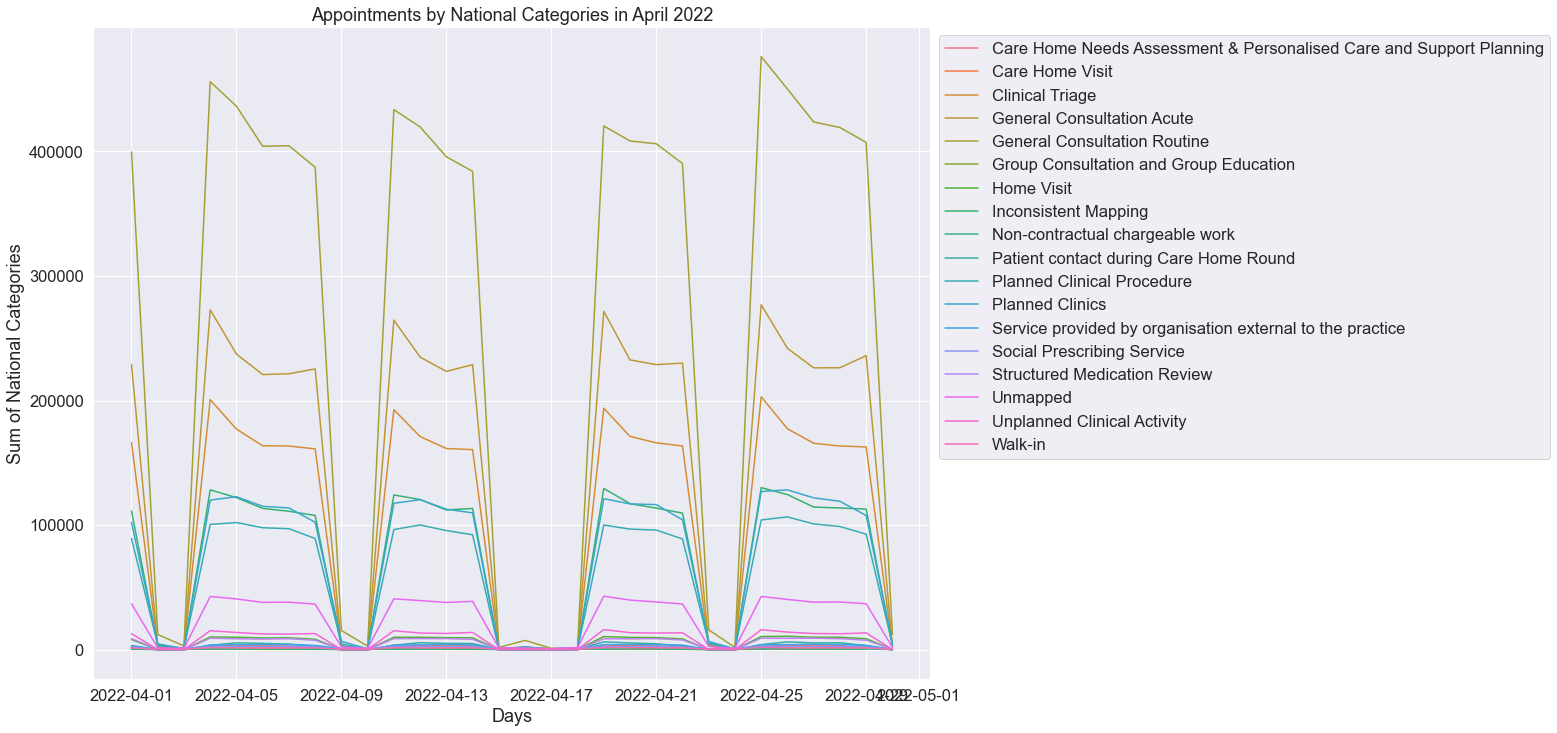

In [74]:
# Look at April 2022 National Categories in more detail to allow a closer look.
nc_apr22 = nc_nc_day[nc_nc_day['appointment_month'] == '2022-04']

# Create a lineplot.
sns.set(font_scale=1.5)
nc_apr22_line = plt.figure(figsize=(15, 12))
nc_apr22_line = sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_apr22,
                             hue='national_category', markers=True, ci=None)

# Set legend and title.
nc_apr22_line.set_xlabel('Days')
nc_apr22_line.set_ylabel('Sum of National Categories')
nc_apr22_line.set_title('Appointments by National Categories in April 2022')
plt.setp(nc_apr22_line.get_legend().get_texts(), fontsize='10')
nc_apr22_line.legend(bbox_to_anchor=(1, 1))

# 

# Assignment activity 5 - Twitter

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [75]:
# Libraries and settings needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Maximum column width to display
pd.options.display.max_colwidth = 200

### 5.1 Twitter Overview

In [76]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [77]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [78]:
# Explore the data set.
tweets.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [79]:
# Would it be useful to only look at retweeted and favourite tweet messages?
tweets['tweet_retweet_count'].value_counts()
# The output means how many times (left) the number of tweets (right) has been retweeted.

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

In [80]:
# Alternative code to try and check validity of the tweets
tweets_r = tweets.sort_values('tweet_retweet_count', ascending=False).head(100)
tweets_r['tweet_retweet_count'].value_counts()
# Output indicates the top 100 entries by number of retweets (right), and how many times retweeted (left)

73     14
208    12
35     10
37      6
53      5
150     4
44      4
63      4
207     3
41      3
85      3
76      3
68      3
62      3
24      2
72      2
23      2
78      2
16      2
39      1
20      1
19      1
303     1
54      1
40      1
48      1
49      1
57      1
79      1
107     1
169     1
15      1
Name: tweet_retweet_count, dtype: int64

In [81]:
# Would it be useful to only look at retweeted and favourite tweet messages?
tweets['tweet_favorite_count'].value_counts()
# The output means how many times (left) the number of tweets (right) has been set as favourite.

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

In [82]:
# Alternative code to try and check validity of the tweets
tweets_r = tweets.sort_values('tweet_favorite_count', ascending=False).head(30)
tweets_r['tweet_favorite_count'].value_counts()
# Output indicates the top 30 entries by number in favourite (right), and how many times favourited (left)

4     7
5     5
3     3
6     2
10    1
7     1
8     1
9     1
42    1
28    1
12    1
13    1
14    1
17    1
18    1
20    1
11    1
Name: tweet_favorite_count, dtype: int64

### 5.2 Twitter text detail analysis

In [83]:
# Create a new DataFrame containing only the text.
tweets_base = pd.DataFrame(tweets)
tweets_text = tweets_base[['tweet_full_text']]
# View the DataFrame.
tweets_text.head()

tweet_full_text
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...

In [84]:
# Loop through the messages, and create a list of values containing the # symbol.

tags = []

for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [85]:
# Display the first 30 records.
tags30 = pd.Series(tags).value_counts()
tags30.iloc[:30]

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [86]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags30).reset_index()
display(data)
# Rename the columns.
dict = {'index': 'word', 0: 'count'}
data.rename(columns=dict, inplace=True)
display(data)

index    0
0       #healthcare  716
1           #health   80
2         #medicine   41
3               #ai   40
4              #job   38
...             ...  ...
1749      #evestudy    1
1750  #patientdata…    1
1751        #secure    1
1752           #sms    1
1753       \n#csjmu    1

[1754 rows x 2 columns]

word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]

In [87]:
# Fix the count datatype.
data['count'] = data['count'].astype('int64')

# View the result.
data.head()

word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [88]:
# Check the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [89]:
# Display records where the count is larger than 10.
data_10 = data[data['count'] > 10]
data_10

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

Text(0.5, 0, 'Number of Tweets')

Text(0, 0.5, 'Hashtags')

Text(0.5, 1.0, 'Number of Tweets by Hastag in Pharma')

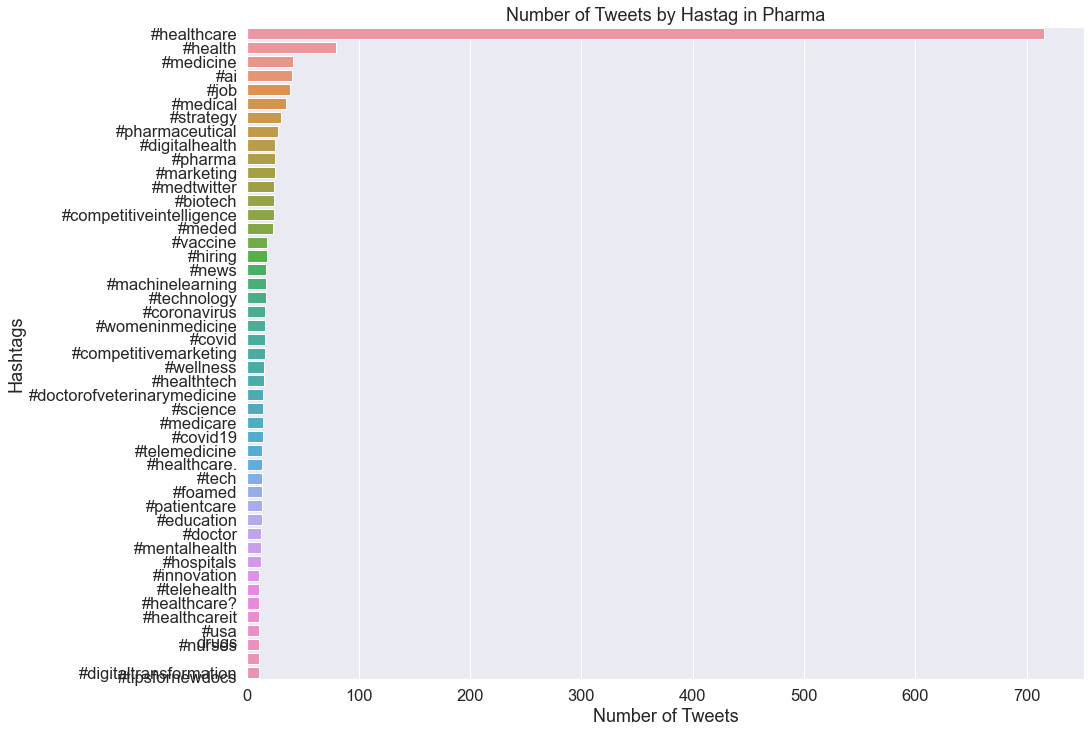

In [90]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.set(font_scale=1.5)
pharma_bar_10 = sns.barplot(x='count', y='word', data=data_10, ci=0)

# Set legend and title.
pharma_bar_10.set_xlabel('Number of Tweets')
pharma_bar_10.set_ylabel('Hashtags')
pharma_bar_10.set_title('Number of Tweets by Hastag in Pharma')

# View the barplot.
plt.show()

Text(0.5, 0, 'Number of Tweets')

Text(0, 0.5, 'Hashtags')

Text(0.5, 1.0, 'Number of Tweets by Hastag in Pharma')

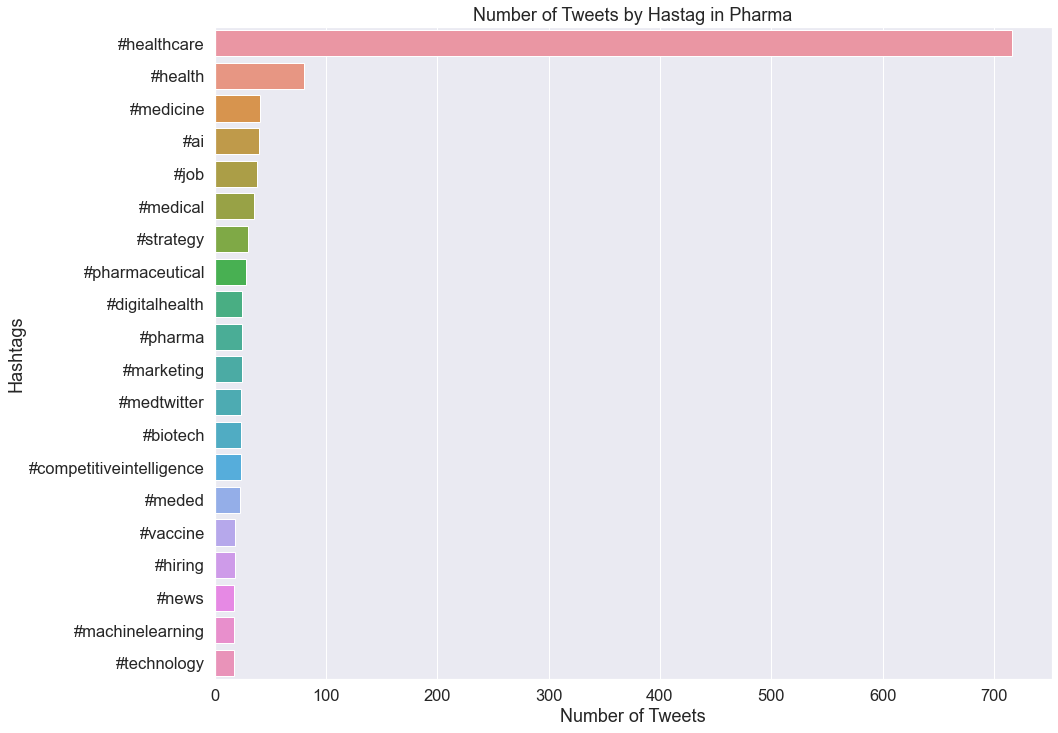

In [91]:
# Create the plot for top 20.
data_10_top20 = data_10.nlargest(20, 'count')
pharma_bar = sns.barplot(x='count', y='word', data=data_10_top20, ci=0)

# Set legend and title.
pharma_bar.set_xlabel('Number of Tweets')
pharma_bar.set_ylabel('Hashtags')
pharma_bar.set_title('Number of Tweets by Hastag in Pharma')

# View the barplot.
plt.show()

# 

# Assignment activity 6 - Further Deep Dive into the Data

### Investigate the main concerns posed by the NHS. 

In [92]:
# Import the necessary libraries.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Ignore warnings.
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

### 6.1 Further Analysis of the Appointments Regional dataset

In [93]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [94]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())
print(
    f"The earliest month in the appointments_regional dataset is {ar['appointment_month'].min()}")
print(
    f"The latest month in the appointments_regional dataset is {ar['appointment_month'].max()}")

2020-01
2022-06
The earliest month in the appointments_regional dataset is 2020-01
The latest month in the appointments_regional dataset is 2022-06


In [95]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_month_filter = ar[ar['appointment_month'] >= "2021-08"]
ar_month_filter.head()

icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034           2021-08           Attended       GP   
3653    E54000034           2021-08           Attended       GP   
3654    E54000034           2021-08           Attended       GP   
3655    E54000034           2021-08           Attended       GP   
3656    E54000034           2021-08           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [96]:
# Create an aggregated data set to review the different features.
ar_agg = ar_month_filter.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode',
                                  'time_between_book_and_appointment']).sum().reset_index()

# View the DataFrame.
ar_agg

appointment_month hcp_type appointment_status appointment_mode  \
0              2021-08       GP           Attended     Face-to-Face   
1              2021-08       GP           Attended     Face-to-Face   
2              2021-08       GP           Attended     Face-to-Face   
3              2021-08       GP           Attended     Face-to-Face   
4              2021-08       GP           Attended     Face-to-Face   
...                ...      ...                ...              ...   
3749           2022-06  Unknown            Unknown          Unknown   
3750           2022-06  Unknown            Unknown          Unknown   
3751           2022-06  Unknown            Unknown          Unknown   
3752           2022-06  Unknown            Unknown          Unknown   
3753           2022-06  Unknown            Unknown     Video/Online   

     time_between_book_and_appointment  count_of_appointments  
0                                1 Day                 507835  
1                       15  to 21 Days                 194726  
2                          2 to 7 Days                 959486  
3                       22  to 28 Days                 102111  
4                        8  to 14 Days                 398772  
...                                ...                    ...  
3749                     8  to 14 Days                   5494  
3750                 More than 28 Days                   5115  
3751                          Same Day                   1914  
3752            Unknown / Data Quality                     53  
3753                       2 to 7 Days                      1  

[3754 rows x 6 columns]

In [97]:
# Determine the total number of appointments per month.
data = pd.DataFrame(ar_agg)
ar_df = data.groupby(['appointment_month'])[
    ['count_of_appointments']].sum().reset_index()
ar_df.head()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily average by month.
ar_df = pd.DataFrame(ar_df, columns=[
                     'appointment_month', 'count_of_appointments', 'avg_daily_appt', 'utilisation'])
ar_df['avg_daily_appt'] = ar_df['count_of_appointments'] / 30
ar_df['avg_daily_appt'] = ar_df['avg_daily_appt'].astype('int64')

# Utilisation of the NHS 1,200,000 maximum daily capacity
ar_df['utilisation'] = round(ar_df['avg_daily_appt'] / 1200000, 1)
ar_df['utilisation'] = ar_df['utilisation'].astype('float')

# View the DataFrame.
ar_df.head()

appointment_month  count_of_appointments
0           2021-08               23852171
1           2021-09               28522501
2           2021-10               30303834
3           2021-11               30405070
4           2021-12               25140776

appointment_month  count_of_appointments  avg_daily_appt  utilisation
0           2021-08               23852171          795072          0.7
1           2021-09               28522501          950750          0.8
2           2021-10               30303834         1010127          0.8
3           2021-11               30405070         1013502          0.8
4           2021-12               25140776          838025          0.7

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Number of Appointments')

Text(0.5, 1.0, 'Total Number of Appointments by Month')

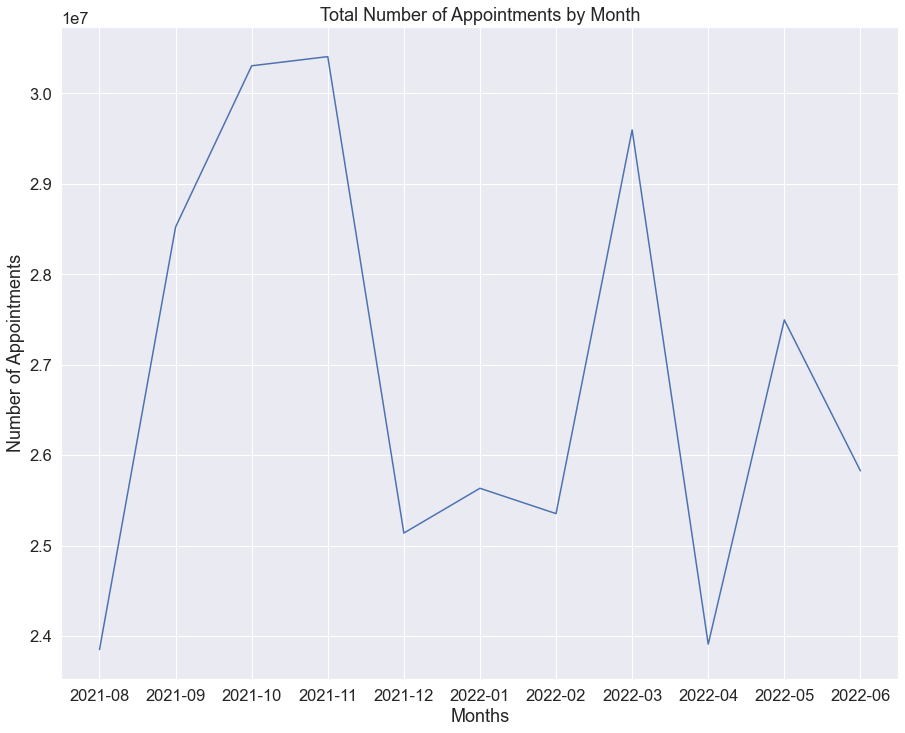

In [98]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
# sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df, ci=None)
sns.set(font_scale=1.5)
ar_df_line = plt.figure(figsize=(15, 12))
ar_df_line = sns.lineplot(x='appointment_month',
                          y='count_of_appointments', data=ar_df, ci=None)

# Set legend and title.
ar_df_line.set_xlabel('Months')
ar_df_line.set_ylabel('Number of Appointments')
ar_df_line.set_title('Total Number of Appointments by Month')

# View the lineplot.
plt.show()

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Proportional Utilisation')

Text(0.5, 1.0, 'Proportional Utilisation of NHS Daily Capacity by Month')

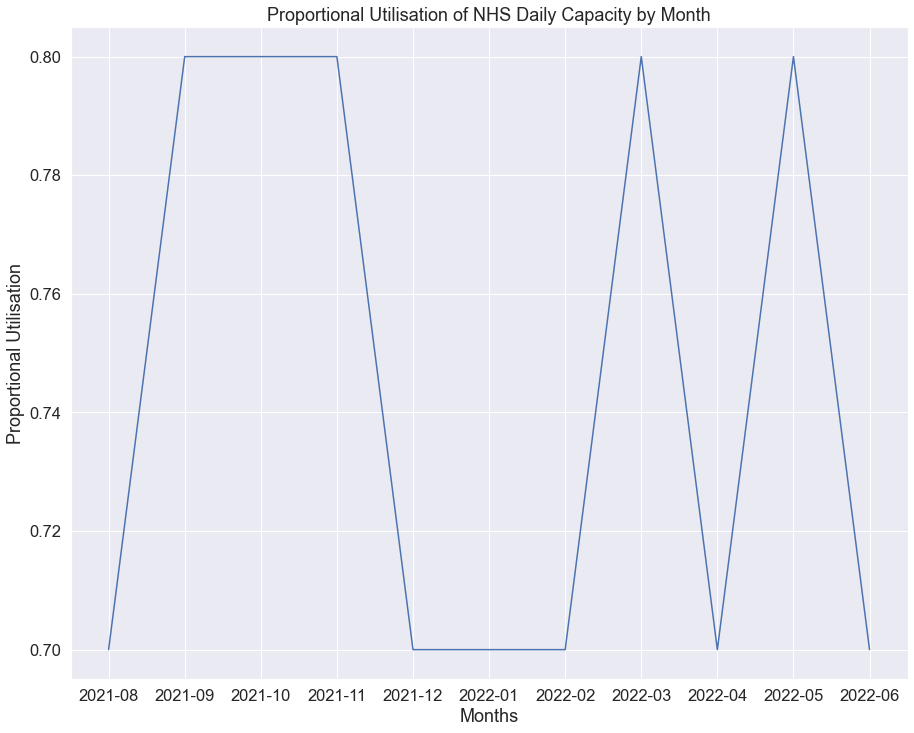

In [99]:
# Plot monthly capacity utilisation.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot.
# sns.lineplot(x='appointment_month', y='utilisation', data=ar_df, ci=None)
sns.set(font_scale=1.5)
ar_df_line = plt.figure(figsize=(15, 12))
ar_df_line = sns.lineplot(x='appointment_month',
                          y='utilisation', data=ar_df, ci=None)

# Set legend and title.
ar_df_line.set_xlabel('Months')
ar_df_line.set_ylabel('Proportional Utilisation')
ar_df_line.set_title('Proportional Utilisation of NHS Daily Capacity by Month')

# View the lineplot.
plt.show()

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Aerage Number of Appointments')

Text(0.5, 1.0, 'Average Number of Appointments by Month')

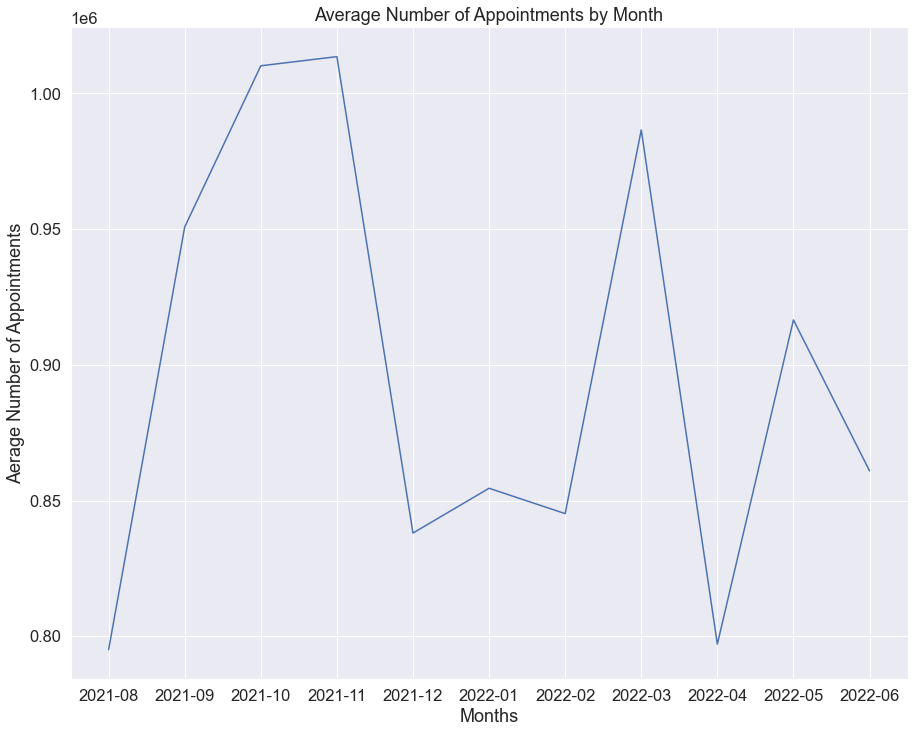

In [100]:
# Plot average daily visits per month.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
sns.set(font_scale=1.5)
ar_df_line = plt.figure(figsize=(15, 12))
ar_df_line = sns.lineplot(x='appointment_month',
                          y='avg_daily_appt', data=ar_df, ci=None)

# Set legend and title.
ar_df_line.set_xlabel('Months')
ar_df_line.set_ylabel('Aerage Number of Appointments')
ar_df_line.set_title('Average Number of Appointments by Month')

# View the lineplot.
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [101]:
# Group the data by ncp type to generate SUM instead of a wrong average.
ar_hcp = pd.DataFrame(ar_agg)
ar_hcp = ar_agg.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

# View the DataFrame.
ar_hcp.head()

appointment_month              hcp_type  count_of_appointments
0           2021-08                    GP               12299022
1           2021-08  Other Practice staff               10797821
2           2021-08               Unknown                 755328
3           2021-09                    GP               14487785
4           2021-09  Other Practice staff               13126731

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of HCP Type')

Text(0.5, 1.0, 'Monthly Appointments by HCP Type')

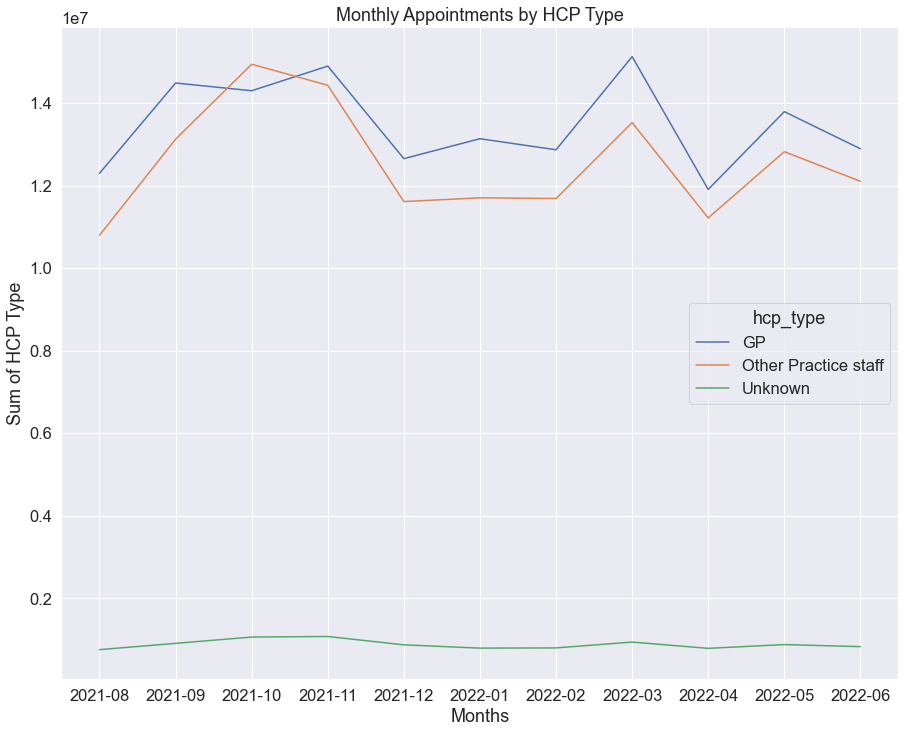

In [102]:
# Create a line plot to answer the question.
# sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg, hue='hcp_type', ci=None)
sns.set(font_scale=1.5)
ar_df_hcp = plt.figure(figsize=(15, 12))
ar_df_hcp = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_hcp, hue='hcp_type', ci=None)

# Set legend and title.
ar_df_hcp.set_xlabel('Months')
ar_df_hcp.set_ylabel('Sum of HCP Type')
ar_df_hcp.set_title('Monthly Appointments by HCP Type')

# View the lineplot.
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

In [103]:
# Group the data by appointment status to generate SUM instead of a wrong average.
ar_as = pd.DataFrame(ar_agg)
ar_as = ar_agg.groupby(
    ['appointment_month', 'appointment_status']).sum().reset_index()

# View the DataFrame.
ar_as.head()

appointment_month appointment_status  count_of_appointments
0           2021-08           Attended               22081765
1           2021-08                DNA                 949137
2           2021-08            Unknown                 821269
3           2021-09           Attended               25757066
4           2021-09                DNA                1321348

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Appointment Status')

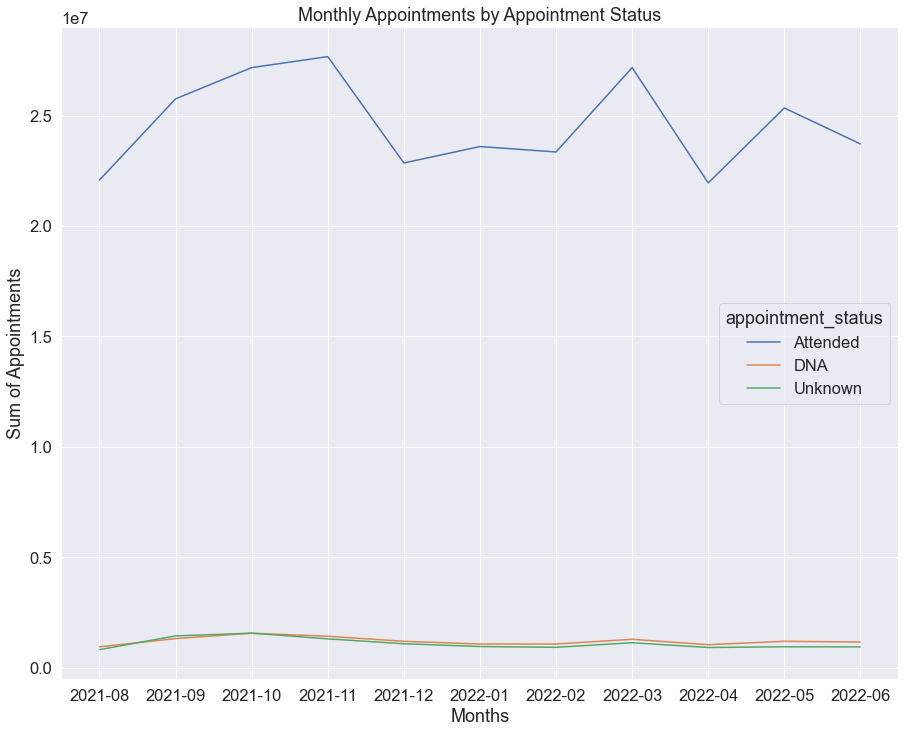

In [104]:
# Create a line plot to answer the question.
# sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_as, hue='appointment_status', ci=None)
sns.set(font_scale=1.5)
ar_df_as = plt.figure(figsize=(15, 12))
ar_df_as = sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_as,
                        hue='appointment_status', ci=None)

# Set legend and title.
ar_df_as.set_xlabel('Months')
ar_df_as.set_ylabel('Sum of Appointments')
ar_df_as.set_title('Monthly Appointments by Appointment Status')

# View the lineplot.
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [105]:
# Group the data by appointment mode to generate SUM instead of a wrong average.
ar_am = pd.DataFrame(ar_agg)
ar_am = ar_agg.groupby(
    ['appointment_month', 'appointment_mode']).sum().reset_index()

# View the DataFrame.
ar_am.head()

appointment_month appointment_mode  count_of_appointments
0           2021-08     Face-to-Face               13717325
1           2021-08       Home Visit                 151619
2           2021-08        Telephone                9149072
3           2021-08          Unknown                 724126
4           2021-08     Video/Online                 110029

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Appointment Mode')

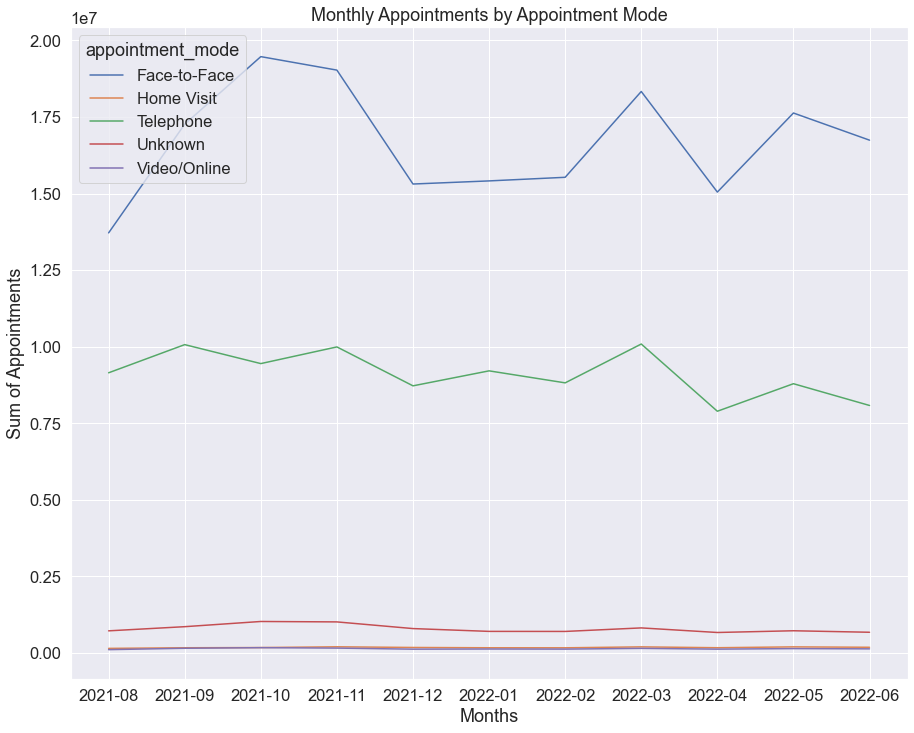

In [106]:
# Create a line plot to answer the question.
# sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_am, hue='appointment_mode', ci=None)
sns.set(font_scale=1.5)
ar_df_am = plt.figure(figsize=(15, 12))
ar_df_am = sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_am,
                        hue='appointment_mode', ci=None)

# Set legend and title.
ar_df_am.set_xlabel('Months')
ar_df_am.set_ylabel('Sum of Appointments')
ar_df_am.set_title('Monthly Appointments by Appointment Mode')

# View the lineplot.
plt.show()

**Question 5:** Are there any trends in time between booking an appointment?

In [107]:
# Group the data by time between book and appointment to generate SUM instead of a wrong average.
ar_tbba = pd.DataFrame(ar_agg)
ar_tbba = ar_agg.groupby(
    ['appointment_month', 'time_between_book_and_appointment']).sum().reset_index()

# View the DataFrame.
ar_tbba.head()

appointment_month time_between_book_and_appointment  count_of_appointments
0           2021-08                             1 Day                2018319
1           2021-08                    15  to 21 Days                1453209
2           2021-08                       2 to 7 Days                4924960
3           2021-08                    22  to 28 Days                 828866
4           2021-08                     8  to 14 Days                2889150

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Time Between Book and Appointment')

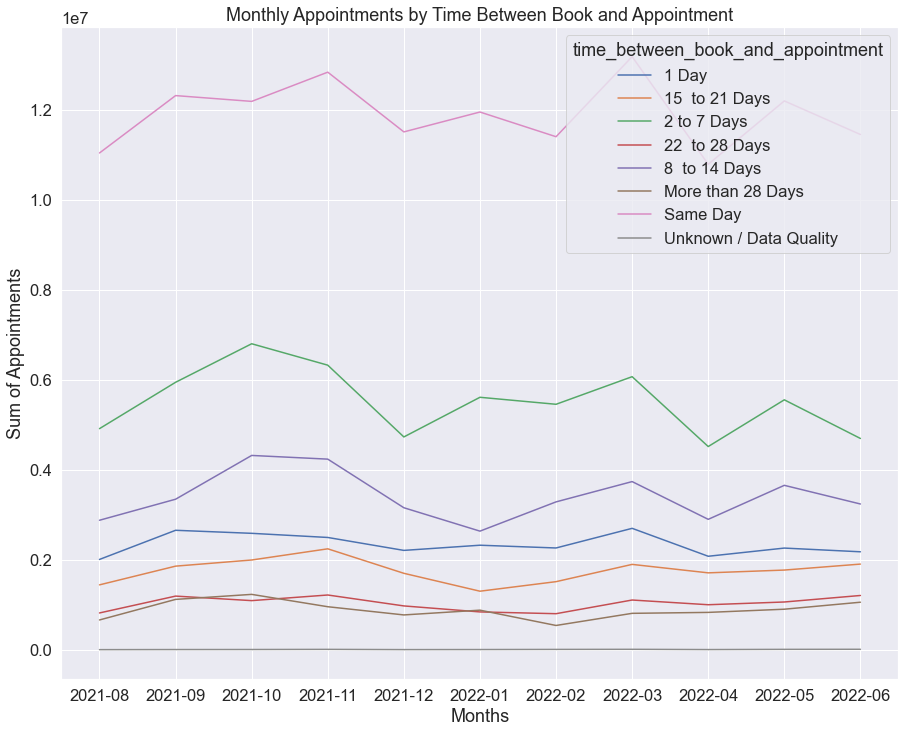

In [108]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)
ar_df_tbba = plt.figure(figsize=(15, 12))
ar_df_tbba = sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_tbba,
                          hue='time_between_book_and_appointment', ci=None)

# Set legend and title.
ar_df_tbba.set_xlabel('Months')
ar_df_tbba.set_ylabel('Sum of Appointments')
ar_df_tbba.set_title(
    'Monthly Appointments by Time Between Book and Appointment')

# View the lineplot.
plt.show()

**Question 6:** How do the spread of service settings compare?

In [109]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc['appointment_month'] = nc['appointment_month'].astype(str)
nc.info()
nc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

In [110]:
# View the DataFrame.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [111]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
data = pd.DataFrame(nc)
nc_appointments = data.groupby(['appointment_month', 'service_setting'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
nc_appointments.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

In [112]:
# Import libraries.
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
InteractiveShell.ast_node_interactivity = 'all'

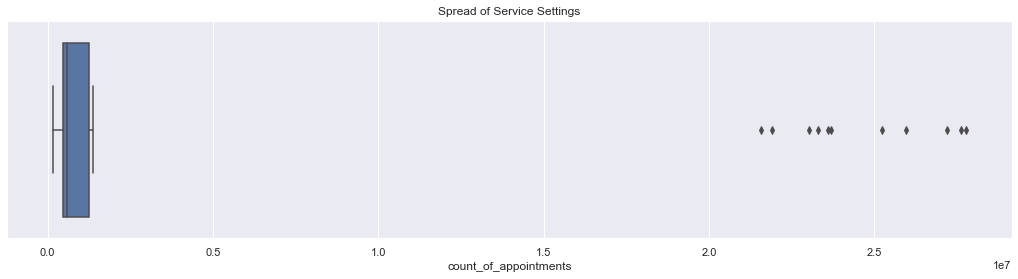

In [113]:
# Create a boxplot to investigate spread of service settings.
# Set figure size.
fig1 = plt.figure(figsize=(18, 4))

# Create a boxplot.
nc_ss_box = sns.boxplot(
    x=nc_appointments['count_of_appointments'], whis=1.5).set(title='Spread of Service Settings')

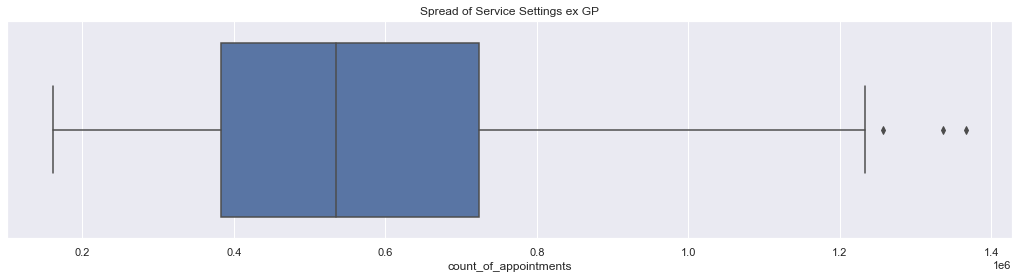

In [114]:
# Create a boxplot to investigate the service settings without GP.
nc_appointments_exgp = nc_appointments[nc_appointments['service_setting']
                                       != 'General Practice']

# Set figure size.
fig2 = plt.figure(figsize=(18, 4))

# Create a boxplot.
nc_ss_box_2 = sns.boxplot(
    x=nc_appointments_exgp['count_of_appointments'], whis=1.5).set(title='Spread of Service Settings ex GP')

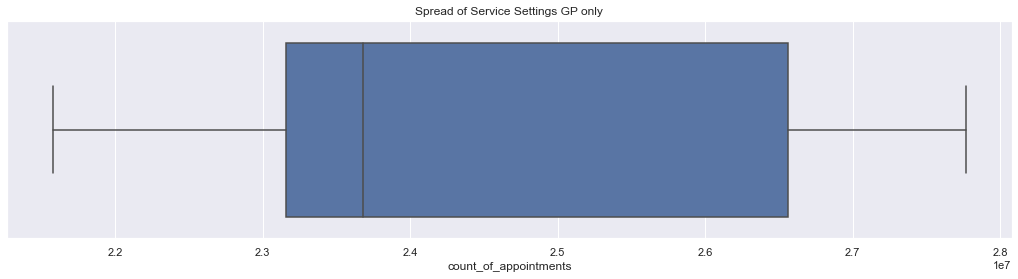

In [115]:
# Create a boxplot to investigate the service settings GP only.
nc_appointments_gp = nc_appointments[nc_appointments['service_setting']
                                     == 'General Practice']

# Set figure size.
fig2 = plt.figure(figsize=(18, 4))

# Create a boxplot.
nc_ss_box_2 = sns.boxplot(
    x=nc_appointments_gp['count_of_appointments'], whis=1.5).set(title='Spread of Service Settings GP only')

In [116]:
# Check the dataset (meta + statistics)
nc_appointments.info()
nc_appointments.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      55 non-null     object
 1   service_setting        55 non-null     object
 2   count_of_appointments  55 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


count_of_appointments
count           5.500000e+01
mean            5.382669e+06
std             9.759049e+06
min             1.609270e+05
25%             4.526270e+05
50%             5.853000e+05
75%             1.245170e+06
max             2.776789e+07

In [117]:
# Sort the service settings by the highest number of appointments within the month
nc_appointments.sort_values('count_of_appointments', ascending=False).head(20)

appointment_month   service_setting  count_of_appointments
16           2021-11  General Practice               27767889
11           2021-10  General Practice               27606171
36           2022-03  General Practice               27187368
6            2021-09  General Practice               25940821
46           2022-05  General Practice               25238620
51           2022-06  General Practice               23680374
26           2022-01  General Practice               23583053
31           2022-02  General Practice               23305934
21           2021-12  General Practice               23008818
41           2022-04  General Practice               21916791
1            2021-08  General Practice               21575852
14           2021-10          Unmapped                1366656
9            2021-09          Unmapped                1336115
19           2021-11          Unmapped                1256496
4            2021-08          Unmapped                1233843
24           2021-12          Unmapped                 954257
39           2022-03          Unmapped                 942912
29           2022-01          Unmapped                 839562
49           2022-05          Unmapped                 820770
34           2022-02          Unmapped                 811246

In [118]:
# Check the dataset (meta + statistics)
nc_appointments_exgp.info()
nc_appointments_exgp.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      44 non-null     object
 1   service_setting        44 non-null     object
 2   count_of_appointments  44 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


count_of_appointments
count           4.400000e+01
mean            5.735245e+05
std             3.190736e+05
min             1.609270e+05
25%             3.823122e+05
50%             5.350780e+05
75%             7.238700e+05
max             1.366656e+06

In [119]:
# Sort the service settings by the highest number of appointments within the month excluding GP
nc_appointments_exgp.sort_values(
    'count_of_appointments', ascending=False).head(20)

appointment_month       service_setting  count_of_appointments
14           2021-10              Unmapped                1366656
9            2021-09              Unmapped                1336115
19           2021-11              Unmapped                1256496
4            2021-08              Unmapped                1233843
24           2021-12              Unmapped                 954257
39           2022-03              Unmapped                 942912
29           2022-01              Unmapped                 839562
49           2022-05              Unmapped                 820770
34           2022-02              Unmapped                 811246
44           2022-04              Unmapped                 760313
54           2022-06              Unmapped                 758640
48           2022-05  Primary Care Network                 712280
38           2022-03  Primary Care Network                 702176
53           2022-06  Primary Care Network                 700599
18           2021-11  Primary Care Network                 614324
43           2022-04  Primary Care Network                 606270
33           2022-02  Primary Care Network                 585300
28           2022-01  Primary Care Network                 569044
13           2021-10  Primary Care Network                 564981
17           2021-11                 Other                 558784

# 7 Answering the NHS Questions on Missed Appointments

In [120]:
# Run the inner join function to add the icb location name to the ar dataset
ar_ons = pd.merge(ar, ons, how='inner', on='icb_ons_code')

# View the DataFrame.
print(ar_ons['count_of_appointments'].count())
ar_ons.tail()

596821


icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments                      icb_location_name  
596816                     21  NHS North East and North Cumbria ICB   
596817                      8  NHS North East and North Cumbria ICB   
596818                     28  NHS North East and North Cumbria ICB   
596819                     17  NHS North East and North Cumbria ICB   
596820                     10  NHS North East and North Cumbria ICB

In [121]:
# Investigate the Appointments by GP only.
# Filter Appointment Date to be 202108 Onwards.
ar_month_filter = ar_ons[ar_ons['appointment_month'] >= "2021-08"]

# Print the Number of Appointments.
print(
    f"Number of Records 2021-08 onwards 2022-06: {ar_month_filter['count_of_appointments'].count()}")

# Filter HCP Type by GP only.
ar_appt_gp = ar_month_filter[ar_month_filter['hcp_type'] == 'GP'].reset_index()

# Print the Number of Records.
print(
    f"Number of Records 2021-08 onwards 2022-06 GP Only: {ar_appt_gp['count_of_appointments'].count()}")

# Split the Number of records by status, mode and book between.
print(ar_appt_gp['appointment_status'].value_counts())
print(ar_appt_gp['appointment_mode'].value_counts())
print(ar_appt_gp['time_between_book_and_appointment'].value_counts())

Number of Records 2021-08 onwards 2022-06: 223418
Number of Records 2021-08 onwards 2022-06 GP Only: 84289
Attended    32992
Unknown     27585
DNA         23712
Name: appointment_status, dtype: int64
Face-to-Face    26612
Telephone       25852
Home Visit      14870
Video/Online    11152
Unknown          5803
Name: appointment_mode, dtype: int64
Same Day                  12901
2 to 7 Days               12772
1 Day                     12247
8  to 14 Days             11757
15  to 21 Days            10603
22  to 28 Days             9930
More than 28 Days          9286
Unknown / Data Quality     4793
Name: time_between_book_and_appointment, dtype: int64


In [122]:
# Create a csv file to save the dataset for the future use if required.
ar_appt_gp.to_csv('ar_appt_gp.csv', index=False)

In [123]:
# Number of records by icb location name
print(ar_appt_gp['icb_location_name'].value_counts())

NHS Greater Manchester ICB                                     7919
NHS Cheshire and Merseyside ICB                                7010
NHS North East and North Cumbria ICB                           6076
NHS Lancashire and South Cumbria ICB                           5458
NHS Humber and North Yorkshire ICB                             4198
NHS Staffordshire and Stoke                                    3992
NHS West Yorkshire ICB                                         3704
NHS Mid and South Essex ICB                                    3448
NHS South Yorkshire ICB                                        3084
NHS Buckinghamshire Oxfordshire and Berkshire West ICB         2813
NHS Hertfordshire and West Essex ICB                           2446
NHS Sussex ICB                                                 2436
NHS Leicester Leicestershire and Rutland ICB                   2256
NHS Suffolk and North East Essex ICB                           2166
NHS Hampshire and Isle Of Wight ICB             

In [124]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by appointment status.
ar_appt_gp_as_tot = data.groupby(['appointment_status'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_as_tot

appointment_status  count_of_appointments
0           Attended              140189684
1                DNA                3845356
2            Unknown                4336402

In [125]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by appointment status and month.
ar_appt_gp_as = data.groupby(['appointment_month', 'appointment_status'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_as

appointment_month appointment_status  count_of_appointments
0            2021-08           Attended               11712148
1            2021-08                DNA                 272890
2            2021-08            Unknown                 313984
3            2021-09           Attended               13597702
4            2021-09                DNA                 393477
5            2021-09            Unknown                 496606
6            2021-10           Attended               13344699
7            2021-10                DNA                 441233
8            2021-10            Unknown                 514819
9            2021-11           Attended               14060578
10           2021-11                DNA                 389228
11           2021-11            Unknown                 447943
12           2021-12           Attended               11963924
13           2021-12                DNA                 320884
14           2021-12            Unknown                 369959
15           2022-01           Attended               12481641
16           2022-01                DNA                 304079
17           2022-01            Unknown                 352330
18           2022-02           Attended               12206696
19           2022-02                DNA                 311527
20           2022-02            Unknown                 351488
21           2022-03           Attended               14315058
22           2022-03                DNA                 383868
23           2022-03            Unknown                 428301
24           2022-04           Attended               11265191
25           2022-04                DNA                 305596
26           2022-04            Unknown                 337676
27           2022-05           Attended               13059755
28           2022-05                DNA                 366195
29           2022-05            Unknown                 367984
30           2022-06           Attended               12182292
31           2022-06                DNA                 356379
32           2022-06            Unknown                 355312

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Appointment Status')

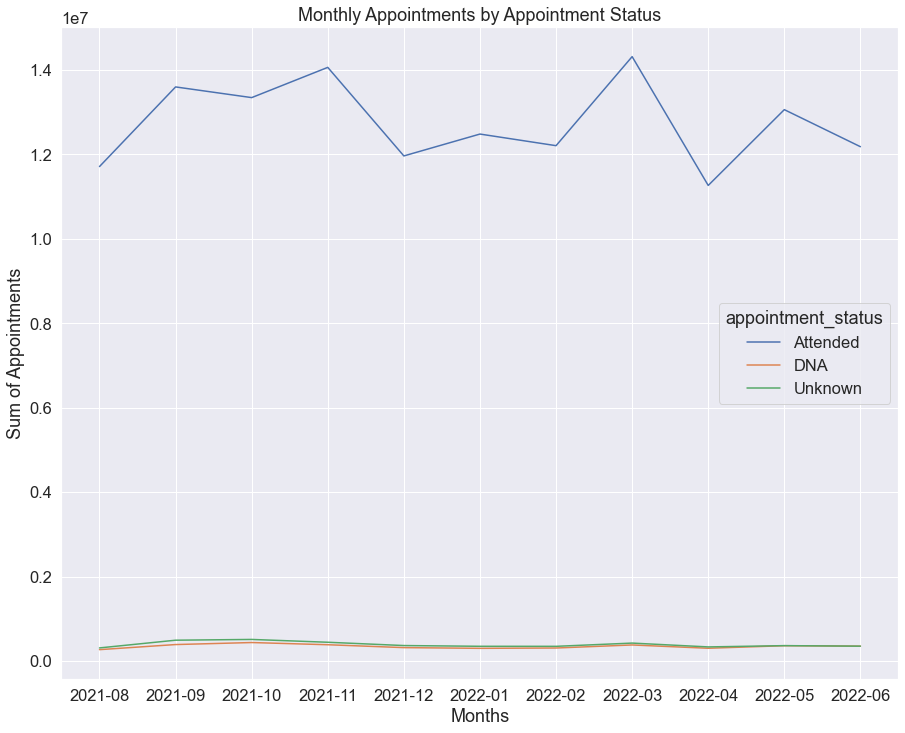

In [126]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_as['appointment_month'] = ar_appt_gp_as['appointment_month'].astype(
    str)

ar_appt_gp_as_line = plt.figure(figsize=(15, 12))
ar_appt_gp_as_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_as, hue='appointment_status', ci=None)

# Set legend and title.
ar_appt_gp_as_line.set_xlabel('Months')
ar_appt_gp_as_line.set_ylabel('Sum of Appointments')
ar_appt_gp_as_line.set_title(
    'Monthly Appointments by Appointment Status')

# View the lineplot.
plt.show()

### STATUS: In total 2.6% DNA and 2.9% Unknown for the number of appointments, but 28.1% DNA and 32.7% Unknown for the number of transactions


In [127]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by appointment mode
ar_appt_gp_am_tot = data.groupby(['appointment_mode'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_am_tot

appointment_mode  count_of_appointments
0     Face-to-Face               75169895
1       Home Visit                 826812
2        Telephone               70168817
3          Unknown                1476807
4     Video/Online                 729111

In [128]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by appointment mode and month.
ar_appt_gp_am = data.groupby(['appointment_month', 'appointment_mode'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_am

appointment_month appointment_mode  count_of_appointments
0            2021-08     Face-to-Face                5568184
1            2021-08       Home Visit                  63630
2            2021-08        Telephone                6469582
3            2021-08          Unknown                 141612
4            2021-08     Video/Online                  56014
5            2021-09     Face-to-Face                7004699
6            2021-09       Home Visit                  70786
7            2021-09        Telephone                7183428
8            2021-09          Unknown                 159847
9            2021-09     Video/Online                  69025
10           2021-10     Face-to-Face                7275634
11           2021-10       Home Visit                  70726
12           2021-10        Telephone                6720898
13           2021-10          Unknown                 162249
14           2021-10     Video/Online                  71244
15           2021-11     Face-to-Face                7520225
16           2021-11       Home Visit                  81258
17           2021-11        Telephone                7059499
18           2021-11          Unknown                 160386
19           2021-11     Video/Online                  76381
20           2021-12     Face-to-Face                6241122
21           2021-12       Home Visit                  73554
22           2021-12        Telephone                6147654
23           2021-12          Unknown                 131534
24           2021-12     Video/Online                  60903
25           2022-01     Face-to-Face                6403208
26           2022-01       Home Visit                  72205
27           2022-01        Telephone                6469510
28           2022-01          Unknown                 129196
29           2022-01     Video/Online                  63931
30           2022-02     Face-to-Face                6473831
31           2022-02       Home Visit                  72469
32           2022-02        Telephone                6132906
33           2022-02          Unknown                 127912
34           2022-02     Video/Online                  62593
35           2022-03     Face-to-Face                7797878
36           2022-03       Home Visit                  85709
37           2022-03        Telephone                7030224
38           2022-03          Unknown                 139888
39           2022-03     Video/Online                  73528
40           2022-04     Face-to-Face                6267840
41           2022-04       Home Visit                  72275
42           2022-04        Telephone                5402104
43           2022-04          Unknown                 106548
44           2022-04     Video/Online                  59696
45           2022-05     Face-to-Face                7491357
46           2022-05       Home Visit                  84539
47           2022-05        Telephone                6033462
48           2022-05          Unknown                 114602
49           2022-05     Video/Online                  69974
50           2022-06     Face-to-Face                7125917
51           2022-06       Home Visit                  79661
52           2022-06        Telephone                5519550
53           2022-06          Unknown                 103033
54           2022-06     Video/Online                  65822

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Appointment Mode')

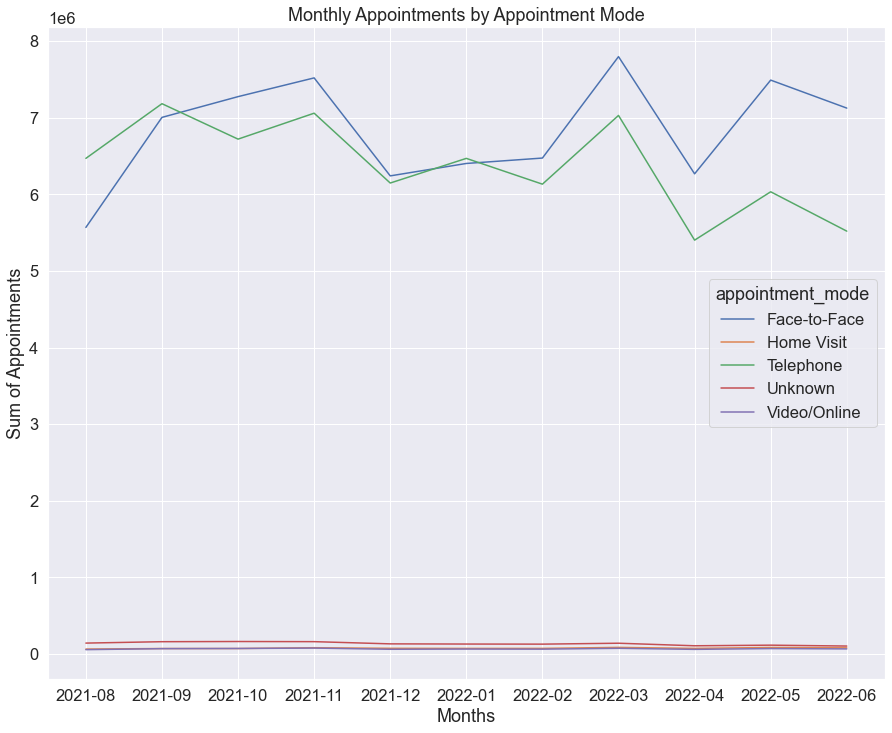

In [129]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_am['appointment_month'] = ar_appt_gp_am['appointment_month'].astype(
    str)

ar_appt_gp_am_line = plt.figure(figsize=(15, 12))
ar_appt_gp_am_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_am, hue='appointment_mode', ci=None)

# Set legend and title.
ar_appt_gp_am_line.set_xlabel('Months')
ar_appt_gp_am_line.set_ylabel('Sum of Appointments')
ar_appt_gp_am_line.set_title(
    'Monthly Appointments by Appointment Mode')

# View the lineplot.
plt.show()

### MODE: 50.7% Face-to-Face (31.6% Transactions), 47.3% Telephone (30.7% Transactions), 1% of Unknown number of appointments, but 6.9% Unknown for the number of transactions

In [130]:
# Create the DataFrame.
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by book between.
ar_appt_gp_bb_tot = data.groupby(['time_between_book_and_appointment'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_bb_tot

time_between_book_and_appointment  count_of_appointments
0                             1 Day               13045690
1                    15  to 21 Days                6671293
2                       2 to 7 Days               25264139
3                    22  to 28 Days                3655241
4                     8  to 14 Days               12958848
5                 More than 28 Days                2371934
6                          Same Day               84313011
7            Unknown / Data Quality                  91286

In [131]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by book between and month.
ar_appt_gp_bb = data.groupby(['appointment_month', 'time_between_book_and_appointment'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_bb

appointment_month time_between_book_and_appointment  count_of_appointments
0            2021-08                             1 Day                1058613
1            2021-08                    15  to 21 Days                 489726
2            2021-08                       2 to 7 Days                2107045
3            2021-08                    22  to 28 Days                 253552
4            2021-08                     8  to 14 Days                 975628
..               ...                               ...                    ...
83           2022-06                    22  to 28 Days                 432150
84           2022-06                     8  to 14 Days                1124263
85           2022-06                 More than 28 Days                 315400
86           2022-06                          Same Day                7309087
87           2022-06            Unknown / Data Quality                  10459

[88 rows x 3 columns]

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Time Between Book and Appointment')

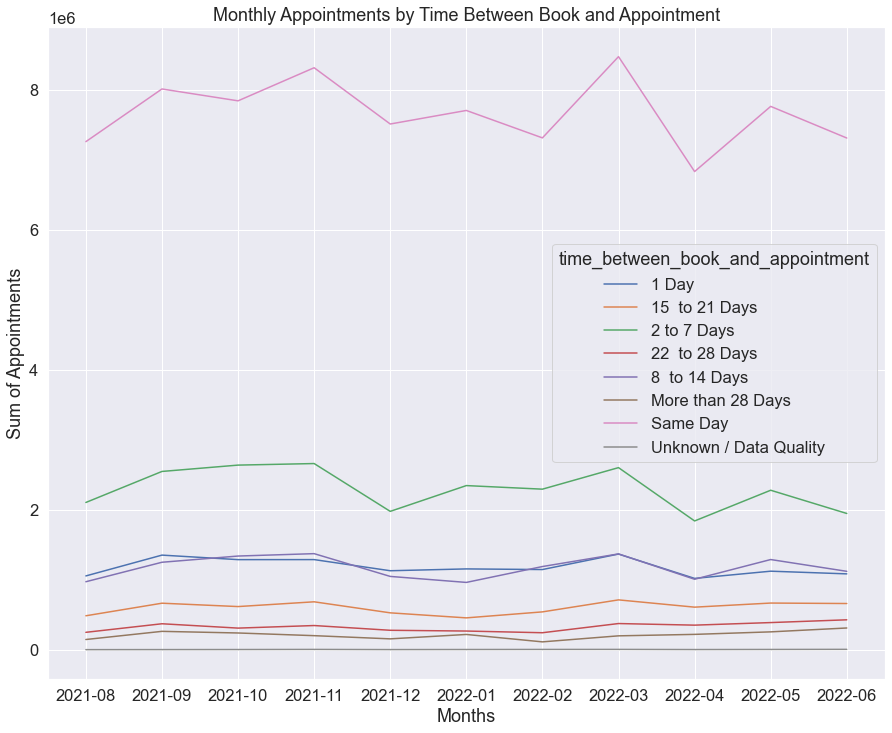

In [132]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_bb['appointment_month'] = ar_appt_gp_bb['appointment_month'].astype(
    str)

ar_appt_gp_bb_line = plt.figure(figsize=(15, 12))
ar_appt_gp_bb_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_bb,
    hue='time_between_book_and_appointment', ci=None)

# Set legend and title.
ar_appt_gp_bb_line.set_xlabel('Months')
ar_appt_gp_bb_line.set_ylabel('Sum of Appointments')
ar_appt_gp_bb_line.set_title(
    'Monthly Appointments by Time Between Book and Appointment')

# View the lineplot.
plt.show()

### BOOKINGS: 57% Same Date Appt (15% Tr), 17% 2-7 Days (15% Tr), 0.1% Unknown number of appts, and 5.7% number of transactions

In [133]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by location name
ar_appt_gp_ln_tot = data.groupby(['icb_location_name'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_ln_tot

icb_location_name  \
0   NHS Bath and North East Somerset Swindon and Wiltshire ICB    
1                 NHS Bedfordshire Luton and Milton Keynes ICB    
2                              NHS Birmingham and Solihull ICB    
3                                        NHS Black Country ICB    
4     NHS Bristol North Somerset and South Gloucestershire ICB    
5       NHS Buckinghamshire Oxfordshire and Berkshire West ICB    
6                      NHS Cambridgeshire and Peterborough ICB    
7                              NHS Cheshire and Merseyside ICB    
8                     NHS Cornwall and The Isles Of Scilly ICB    
9                            NHS Coventry and Warwickshire ICB    
10                                NHS Derby and Derbyshire ICB    
11                                               NHS Devon ICB    
12                                              NHS Dorset ICB    
13                                             NHS Frimley ICB    
14                                     NHS Gloucestershire ICB    
15                                  NHS Greater Manchester ICB    
16                         NHS Hampshire and Isle Of Wight ICB    
17                    NHS Herefordshire and Worcestershire ICB    
18                        NHS Hertfordshire and West Essex ICB    
19                          NHS Humber and North Yorkshire ICB    
20                                     NHS Kent and Medway ICB    
21                        NHS Lancashire and South Cumbria ICB    
22                NHS Leicester Leicestershire and Rutland ICB    
23                                        NHS Lincolnshire ICB    
24                                 NHS Mid and South Essex ICB    
25                                 NHS Norfolk and Waveney ICB    
26                                NHS North Central London ICB    
27                                   NHS North East London ICB    
28                        NHS North East and North Cumbria ICB    
29                                   NHS North West London ICB    
30                                    NHS Northamptonshire ICB    
31                      NHS Nottingham and Nottinghamshire ICB    
32                       NHS Shropshire Telford and Wrekin ICB    
33                                            NHS Somerset ICB    
34                                   NHS South East London ICB    
35                                   NHS South West London ICB    
36                                     NHS South Yorkshire ICB    
37                                  NHS Staffordshire and Stoke   
38                        NHS Suffolk and North East Essex ICB    
39                                   NHS Surrey Heartlands ICB    
40                                              NHS Sussex ICB    
41                                      NHS West Yorkshire ICB    

    count_of_appointments  
0                 2364516  
1                 2309547  
2                 3653810  
3                 3784530  
4                 2456379  
5                 4809886  
6                 2233767  
7                 6996382  
8                 1585682  
9                 2823854  
10                2832696  
11                3348778  
12                1974509  
13                2194810  
14                1768463  
15                7418144  
16                4432479  
17                2472724  
18                3980875  
19                4038459  
20                4680707  
21                4146478  
22                2950830  
23                1537999  
24                2698121  
25                2373767  
26                4152406  
27                5698902  
28                7696695  
29                6433479  
30                1788903  
31                3063133  
32                1292153  
33                1475787  
34                4851809  
35                4484592  
36                3358602  
37                2556358  
38                2173629  
39                2863893  
40              

In [134]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp)

# Total Number of appointments by location name and month.
ar_appt_gp_ln = data.groupby(['appointment_month', 'icb_location_name'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_ln

appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
457           2022-06   
458           2022-06   
459           2022-06   
460           2022-06   
461           2022-06   

                                               icb_location_name  \
0    NHS Bath and North East Somerset Swindon and Wiltshire ICB    
1                  NHS Bedfordshire Luton and Milton Keynes ICB    
2                               NHS Birmingham and Solihull ICB    
3                                         NHS Black Country ICB    
4      NHS Bristol North Somerset and South Gloucestershire ICB    
..                                                           ...   
457                                  NHS Staffordshire and Stoke   
458                        NHS Suffolk and North East Essex ICB    
459                                   NHS Surrey Heartlands ICB    
460                                              NHS Sussex ICB    
461                                      NHS West Yorkshire ICB    

     count_of_appointments  
0                   197646  
1                   193193  
2                   308597  
3                   318916  
4                   203870  
..                     ...  
457                 213770  
458                 184402  
459                 245751  
460                 386471  
461                 542863  

[462 rows x 3 columns]

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Location Name')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

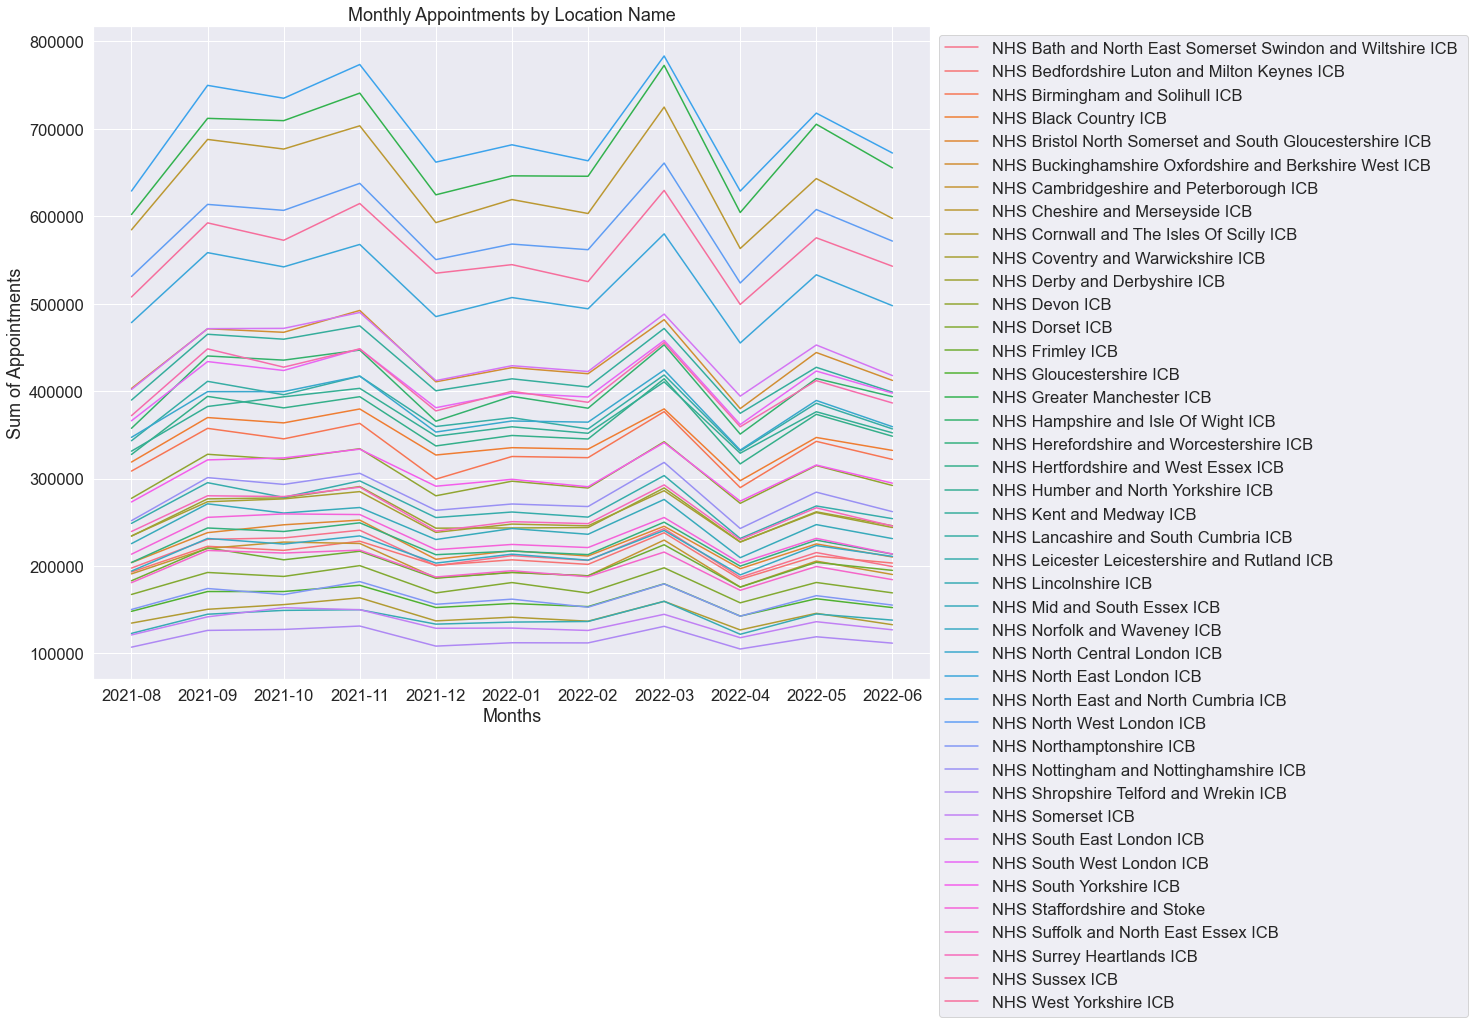

In [135]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_ln['appointment_month'] = ar_appt_gp_ln['appointment_month'].astype(
    str)

ar_appt_gp_ln_line = plt.figure(figsize=(15, 12))
ar_appt_gp_ln_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_ln, hue='icb_location_name', ci=None)

# Set legend and title.
ar_appt_gp_ln_line.set_xlabel('Months')
ar_appt_gp_ln_line.set_ylabel('Sum of Appointments')
ar_appt_gp_ln_line.set_title(
    'Monthly Appointments by Location Name')

# View the lineplot.
plt.setp(ar_appt_gp_ln_line.get_legend().get_texts(), fontsize='10')
ar_appt_gp_ln_line.legend(bbox_to_anchor=(1, 1))

### ICB: 9% of all the transactions are with Manchester, 8% Cheshire, 7% North, 6% South Cumbria

### Focus on the known DNA (23.7k transactions and 3.8m appt, 1.3% of the total), as the Unknown is a speculation and can be attributed to the data quality

In [136]:
# Filter the appointment status to only show DNA (Did not attend).
ar_appt_gp_dna = ar_appt_gp[ar_appt_gp['appointment_status']
                            == 'DNA'].reset_index()

# Print the total number of record for DNA (Did not attend) and split by mode and book between.
print(
    f"Number of Records 2021-08 onwards 2022-06 GP DNA Only: {ar_appt_gp_dna['count_of_appointments'].count()}")
print(ar_appt_gp_dna['appointment_mode'].value_counts())
print(ar_appt_gp_dna['time_between_book_and_appointment'].value_counts())

Number of Records 2021-08 onwards 2022-06 GP DNA Only: 23712
Face-to-Face    8492
Telephone       8148
Home Visit      2779
Video/Online    2550
Unknown         1743
Name: appointment_mode, dtype: int64
Same Day                  3945
2 to 7 Days               3827
1 Day                     3605
8  to 14 Days             3352
15  to 21 Days            3022
22  to 28 Days            2806
More than 28 Days         2645
Unknown / Data Quality     510
Name: time_between_book_and_appointment, dtype: int64


In [137]:
# Create a csv file to save the dataset for the future use if required.
ar_appt_gp_dna.to_csv('ar_appt_gp_dna.csv', index=False)

In [138]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by appointment mode
ar_appt_gp_dna_am_tot = data.groupby(['appointment_mode'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_dna_am_tot

appointment_mode  count_of_appointments
0     Face-to-Face                2606816
1       Home Visit                  21607
2        Telephone                1150878
3          Unknown                  44734
4     Video/Online                  21321

In [139]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by appointment mode and month.
ar_appt_gp_dna_am = data.groupby(['appointment_month', 'appointment_mode'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_dna_am

appointment_month appointment_mode  count_of_appointments
0            2021-08     Face-to-Face                 160717
1            2021-08       Home Visit                   1627
2            2021-08        Telephone                 104076
3            2021-08          Unknown                   4886
4            2021-08     Video/Online                   1584
5            2021-09     Face-to-Face                 266595
6            2021-09       Home Visit                   1992
7            2021-09        Telephone                 117327
8            2021-09          Unknown                   5496
9            2021-09     Video/Online                   2067
10           2021-10     Face-to-Face                 319293
11           2021-10       Home Visit                   2126
12           2021-10        Telephone                 109707
13           2021-10          Unknown                   7376
14           2021-10     Video/Online                   2731
15           2021-11     Face-to-Face                 266643
16           2021-11       Home Visit                   2446
17           2021-11        Telephone                 112812
18           2021-11          Unknown                   4806
19           2021-11     Video/Online                   2521
20           2021-12     Face-to-Face                 215770
21           2021-12       Home Visit                   2073
22           2021-12        Telephone                  97283
23           2021-12          Unknown                   3946
24           2021-12     Video/Online                   1812
25           2022-01     Face-to-Face                 198174
26           2022-01       Home Visit                   2130
27           2022-01        Telephone                  98645
28           2022-01          Unknown                   3480
29           2022-01     Video/Online                   1650
30           2022-02     Face-to-Face                 207128
31           2022-02       Home Visit                   2017
32           2022-02        Telephone                  97510
33           2022-02          Unknown                   3364
34           2022-02     Video/Online                   1508
35           2022-03     Face-to-Face                 260580
36           2022-03       Home Visit                   1951
37           2022-03        Telephone                 115660
38           2022-03          Unknown                   3833
39           2022-03     Video/Online                   1844
40           2022-04     Face-to-Face                 207280
41           2022-04       Home Visit                   1717
42           2022-04        Telephone                  92110
43           2022-04          Unknown                   2918
44           2022-04     Video/Online                   1571
45           2022-05     Face-to-Face                 254001
46           2022-05       Home Visit                   1871
47           2022-05        Telephone                 105741
48           2022-05          Unknown                   2525
49           2022-05     Video/Online                   2057
50           2022-06     Face-to-Face                 250635
51           2022-06       Home Visit                   1657
52           2022-06        Telephone                 100007
53           2022-06          Unknown                   2104
54           2022-06     Video/Online                   1976

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Appointment Mode')

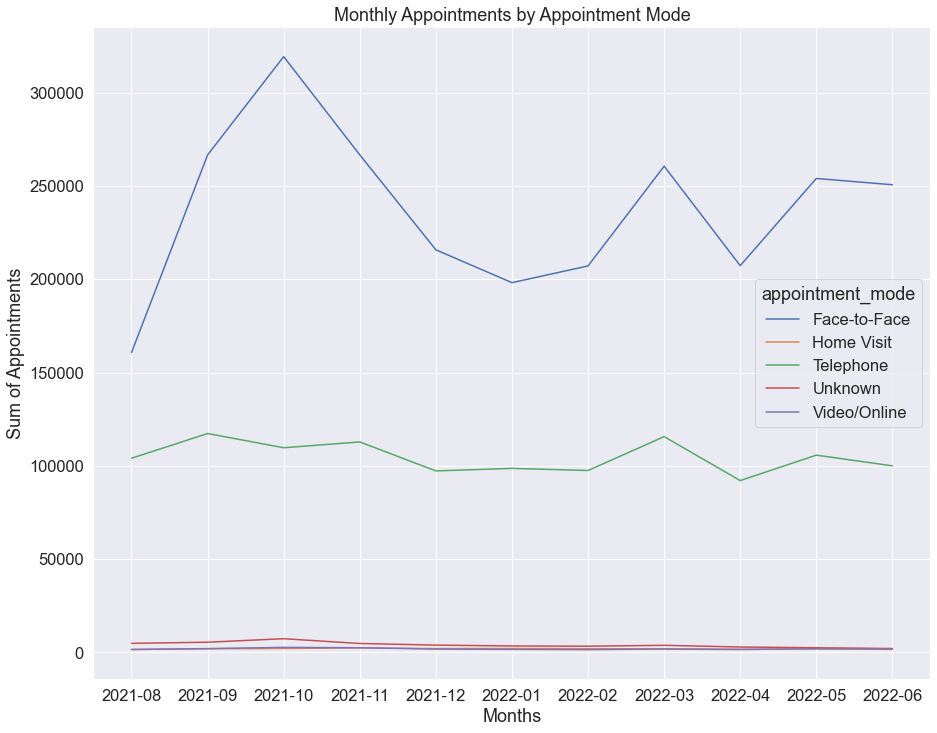

In [140]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_dna_am['appointment_month'] = ar_appt_gp_dna_am['appointment_month'].astype(
    str)

ar_appt_gp_dna_am_line = plt.figure(figsize=(15, 12))
ar_appt_gp_dna_am_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_dna_am, hue='appointment_mode', ci=None)

# Set legend and title.
ar_appt_gp_dna_am_line.set_xlabel('Months')
ar_appt_gp_dna_am_line.set_ylabel('Sum of Appointments')
ar_appt_gp_dna_am_line.set_title(
    'Monthly Appointments by Appointment Mode')

# View the lineplot.
plt.show()

### MODE DNA: 67.8% Face-to-Face, 29.9% Telephone

In [141]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by book between.
ar_appt_gp_dna_bb_tot = data.groupby(['time_between_book_and_appointment'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_dna_bb_tot

time_between_book_and_appointment  count_of_appointments
0                             1 Day                 375403
1                    15  to 21 Days                 333251
2                       2 to 7 Days                 970741
3                    22  to 28 Days                 190223
4                     8  to 14 Days                 604317
5                 More than 28 Days                 161886
6                          Same Day                1207272
7            Unknown / Data Quality                   2263

In [142]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by book between and month.
ar_appt_gp_dna_bb = data.groupby(['appointment_month', 'time_between_book_and_appointment'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_dna_bb

appointment_month time_between_book_and_appointment  count_of_appointments
0            2021-08                             1 Day                  27369
1            2021-08                    15  to 21 Days                  19587
2            2021-08                       2 to 7 Days                  67724
3            2021-08                    22  to 28 Days                  11025
4            2021-08                     8  to 14 Days                  37534
..               ...                               ...                    ...
83           2022-06                    22  to 28 Days                  23595
84           2022-06                     8  to 14 Days                  55384
85           2022-06                 More than 28 Days                  20600
86           2022-06                          Same Day                 112191
87           2022-06            Unknown / Data Quality                    201

[88 rows x 3 columns]

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Time Between Book and Appointment')

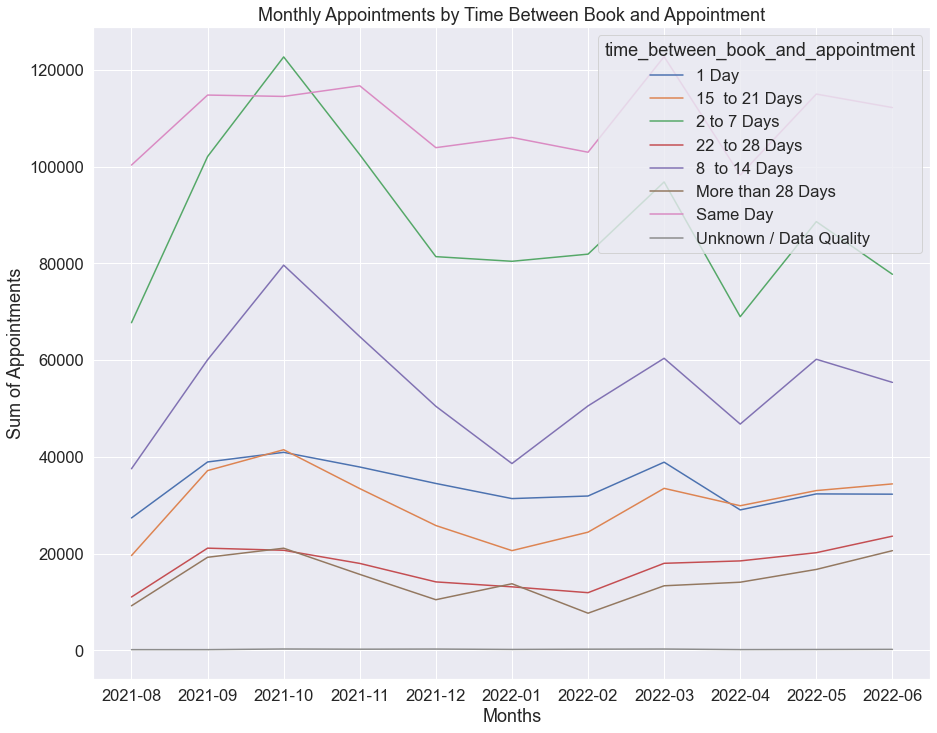

In [143]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_dna_bb['appointment_month'] = ar_appt_gp_dna_bb['appointment_month'].astype(
    str)

ar_appt_gp_dna_bb_line = plt.figure(figsize=(15, 12))
ar_appt_gp_dna_bb_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_dna_bb,
    hue='time_between_book_and_appointment', ci=None)

# Set legend and title.
ar_appt_gp_dna_bb_line.set_xlabel('Months')
ar_appt_gp_dna_bb_line.set_ylabel('Sum of Appointments')
ar_appt_gp_dna_bb_line.set_title(
    'Monthly Appointments by Time Between Book and Appointment')

# View the lineplot.
plt.show()

### BOOKINGS DNA: 31% Same Day, 25% 2-7 Days, 16% 8-14 Days

In [144]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by location name.
ar_appt_gp_dna_ln_tot = data.groupby(['icb_location_name'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame top 10.
ar_appt_gp_dna_ln_tot.sort_values(
    'count_of_appointments', ascending=False).head(10)

icb_location_name  count_of_appointments
15            NHS Greater Manchester ICB                  279067
7        NHS Cheshire and Merseyside ICB                  226688
27             NHS North East London ICB                  195552
29             NHS North West London ICB                  184873
34             NHS South East London ICB                  178564
28  NHS North East and North Cumbria ICB                  173869
35             NHS South West London ICB                  162888
26          NHS North Central London ICB                  149130
20               NHS Kent and Medway ICB                  133973
16   NHS Hampshire and Isle Of Wight ICB                  123769

In [145]:
# Create the DataFrame
data = pd.DataFrame(ar_appt_gp_dna)

# Total Number of appointments by location name and month.
ar_appt_gp_dna_ln = data.groupby(['appointment_month', 'icb_location_name'])[
    ['count_of_appointments']].sum().reset_index()

# View the DataFrame.
ar_appt_gp_dna_ln

appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
457           2022-06   
458           2022-06   
459           2022-06   
460           2022-06   
461           2022-06   

                                               icb_location_name  \
0    NHS Bath and North East Somerset Swindon and Wiltshire ICB    
1                  NHS Bedfordshire Luton and Milton Keynes ICB    
2                               NHS Birmingham and Solihull ICB    
3                                         NHS Black Country ICB    
4      NHS Bristol North Somerset and South Gloucestershire ICB    
..                                                           ...   
457                                  NHS Staffordshire and Stoke   
458                        NHS Suffolk and North East Essex ICB    
459                                   NHS Surrey Heartlands ICB    
460                                              NHS Sussex ICB    
461                                      NHS West Yorkshire ICB    

     count_of_appointments  
0                     2174  
1                     2481  
2                     8639  
3                     8933  
4                     5775  
..                     ...  
457                   6480  
458                   2863  
459                   7221  
460                   7591  
461                  10035  

[462 rows x 3 columns]

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Sum of Appointments')

Text(0.5, 1.0, 'Monthly Appointments by Location Name')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

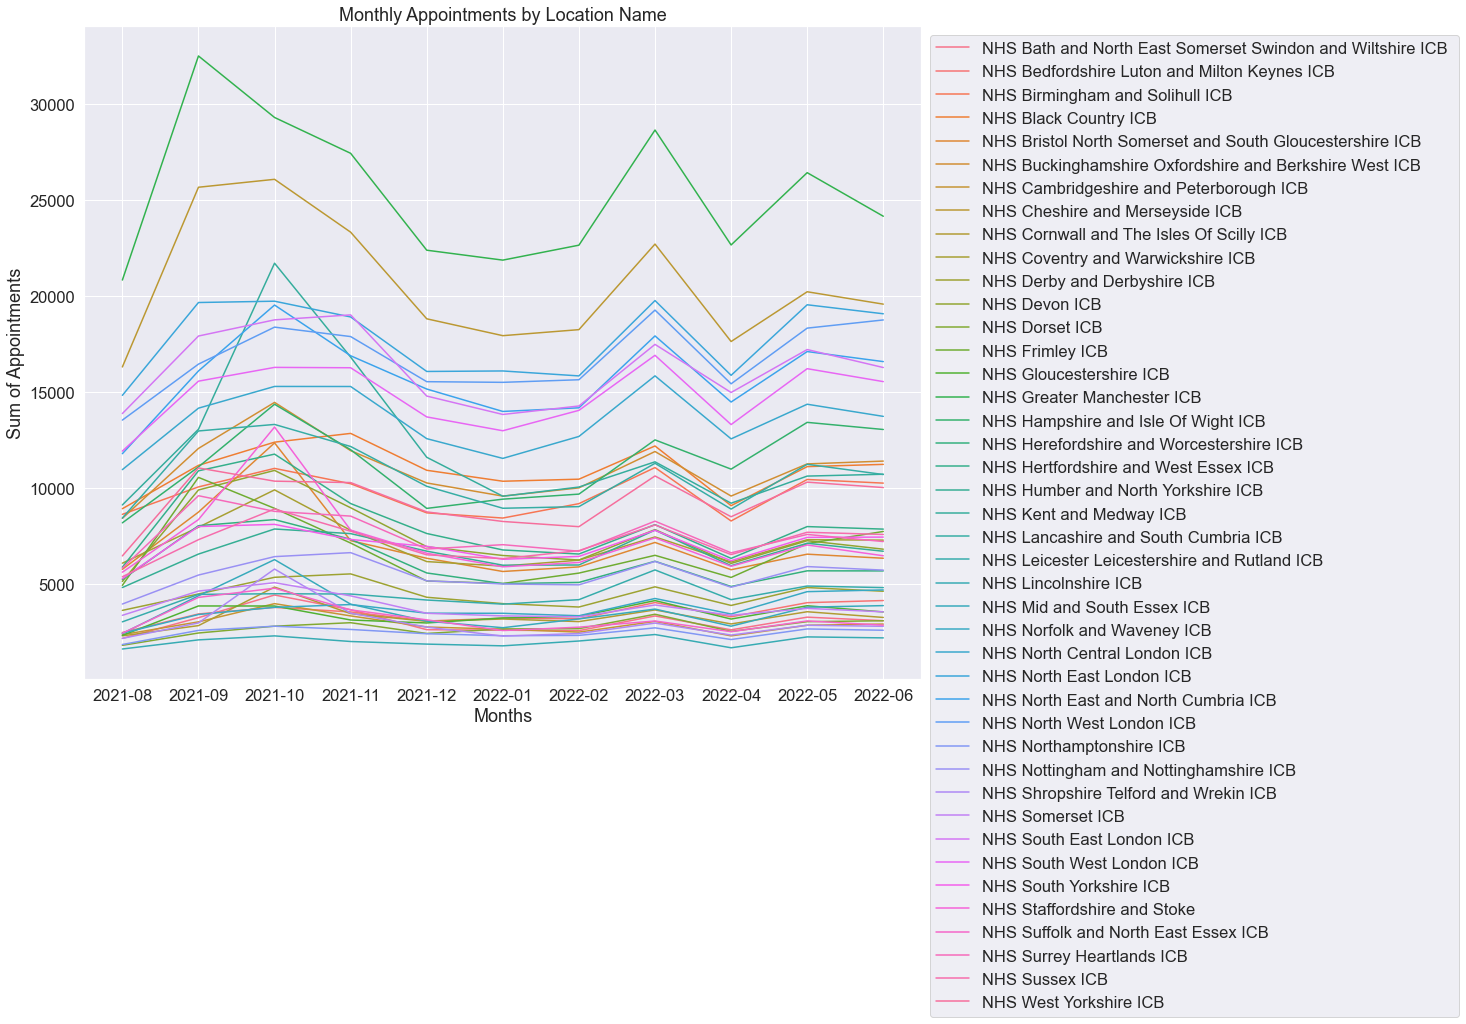

In [146]:
# Create a line plot to answer the question.
sns.set(font_scale=1.5)

# Change the format for the appt month to string.
ar_appt_gp_dna_ln['appointment_month'] = ar_appt_gp_dna_ln['appointment_month'].astype(
    str)

ar_appt_gp_dna_ln_line = plt.figure(figsize=(15, 12))
ar_appt_gp_dna_ln_line = sns.lineplot(
    x='appointment_month', y='count_of_appointments', data=ar_appt_gp_dna_ln, hue='icb_location_name', ci=None)

# Set legend and title.
ar_appt_gp_dna_ln_line.set_xlabel('Months')
ar_appt_gp_dna_ln_line.set_ylabel('Sum of Appointments')
ar_appt_gp_dna_ln_line.set_title(
    'Monthly Appointments by Location Name')

# View the lineplot.
plt.setp(ar_appt_gp_dna_ln_line.get_legend().get_texts(), fontsize='10')
ar_appt_gp_dna_ln_line.legend(bbox_to_anchor=(1, 1))

### LOCATIONS: Top 10 List Provided to The Customer

# 

### Provide a summary of your findings and recommendations based on the analysis.

### Conclusions

>
No adverse comments on social media (Twitter) trending, so the complaints are taken care of, assuming that the twitter dataset corresponds to the same time horizon.
>
During the peak the capacity stays under the critical level of total network utilization, but further information would be required if more granular level is to be investigated.
>
Out of the total number of general practice appointments – 2.6% did not attend, but this forms 28.1% of the transactions.
>
3.8 million appointments not attended which forms 1.3% of the total appointments for the period and seems small, but in the absolute terms catering for 3.8 million failed appointments would be costly.
>
The disparity between the appointment request and the short notice availability needs to be assessed as 56% of the appointment are missed when placed up to a week prior to the appointment.
>
30% of all the GP transactions are registered with 4 locations (42 locations in total).
>
List of the Top 10 locations where the problem with missing appointments persists provided to the NHS. Focus should be given to the Greater Manchester ICB, Cheshire and Merseyside, and London branches should be carefully monitored.
>
The datasets isolating GP and Unattended Appointments are available for download and upon request.

### Recommendations

> 
The current analytics research is an interim analysis answering the question “where the problem exists?”
> 
The next phase for the NHS would be to get back into its network and start asking questions “why it is happening?”
> 
To answer the question how to reduce avoidable costs and reduce/eliminate unattended appointments the NHS need to provide the deeper and more granular data from within its value chain to the project team to start the next phase of the analysis.